# Pre-Processing

In [1]:
# Init pack
#run the model without additional noise, plot the same intial conditions observe if the determinstic emulation matches the physical model
#emulator smooths out to a state in the same way as the physical model

import numpy as np
import numpy as np
from scipy.integrate import solve_ivp
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
import torch
import matplotlib.pyplot as plt

psi = np.load(r'/home/fabio/work/HM_and_AI_models/VAE_Model/data/time_series_deterministic.npy')
print(psi.shape)

# psi = psi[:,1,:]
print(psi.shape)

# Normalization
mean_psi = np.mean(psi, axis=0, keepdims=True)
std_psi = np.std(psi, axis=0, keepdims=True)
psi = (psi - mean_psi) / std_psi

# Pre-processing
lead = 1

trainN = 1400000
valN = 50000
index = 63


psi_train_input = torch.tensor(psi[0:trainN, :], dtype=torch.float32)
# print(psi_train_input.shape)
# plt.plot(psi_train_input[:,63])
# psi_train_label =  torch.tensor(psi[lead:trainN+lead, :], dtype=torch.float32)
# plt.plot(psi_train_label[:,63], color='r')

# Make sure input and label lengths match
# assert psi_train_input.shape[0] == psi_train_label.shape[0], "Input and label length mismatch"

#shuffle and map indices\
# valid_indices = np.arange(0, trainN - lead)
# np.random.seed(42)  # Optional for reproducibility
# shuffled_indices = np.random.permutation(valid_indices)

psi_train_input = torch.tensor(psi[0:trainN, :], dtype=torch.float32)
psi_train_label = torch.tensor(psi[lead: trainN + lead, :], dtype=torch.float32)

# print(torch.allclose(psi_train_input[0], torch.tensor(psi[t], dtype=torch.float32)))
# print(torch.allclose(psi_train_label[0], torch.tensor(psi[t + 1], dtype=torch.float32)))

psi_val_input = torch.tensor(psi[trainN:trainN+valN], dtype=torch.float32)
psi_val_label = torch.tensor(psi[trainN+lead:trainN+valN+lead], dtype=torch.float32)

print(psi_train_input.shape)
print(psi_train_label.shape)
print(psi_val_input.shape)
print(psi_val_label.shape)
plt.show()
# plt.plot(psi_val_input[0:50000,63]

(2000000, 75)
(2000000, 75)
torch.Size([1400000, 75])
torch.Size([1400000, 75])
torch.Size([50000, 75])
torch.Size([50000, 75])


# Model Architecture

In [4]:
# Define the decoder (MLP)
class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim, condition_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim + condition_dim, 512)  
        self.fc2 = nn.Linear(512, 512)  
        self.fc3 = nn.Linear(512, 512) 
        self.fc4 = nn.Linear(512, 512)  
        self.fc5 = nn.Linear(512, 512)  
        self.fc6 = nn.Linear(512, 512)  
        self.fc_output = nn.Linear(512, output_dim)

    def forward(self, z, condition):
        z = torch.cat((z, condition), dim=1)  # Concatenate latent vector and condition
        z = torch.relu(self.fc1(z))  # Activation function for hidden layer
        z = torch.relu(self.fc2(z)) + z
        z = torch.relu(self.fc3(z)) + z
        z = torch.relu(self.fc4(z)) + z
        z = torch.relu(self.fc5(z)) + z
        z = torch.relu(self.fc6(z)) + z
        output = self.fc_output(z)
        return output

# Define the LatentDecoder class
class LatentDecoder(nn.Module):
    def __init__(self, latent_dim, output_dim, condition_dim):
        super(LatentDecoder, self).__init__()
        self.decoder = Decoder(latent_dim, output_dim, condition_dim)

    def decode(self, z, condition):
        return self.decoder(z, condition)

    def forward(self, z, condition,):
        output = self.decode(z, condition)
        return output

output_dim = 75
latent_dim = 1024
condition_dim = 75
batch_size = 100
num_epochs = 1000

# Initialize Model and Set Folder Path

In [5]:
import datetime
import os
# init the model and optimizer
model = LatentDecoder(latent_dim, output_dim, condition_dim)
model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.%f")
folder = f"model_at_{timestamp}"
model_weights_path = f'{folder}/model_weights_pytorch.pth'
os.makedirs(folder)

# Training

Reference Real Data average_transition_time: 112.85338577818911
Epoch 1, 
        Reconstrunction Loss: 0.02638779580593109

        Validation Reconstrunction Loss: 0.0336398184299469


Mini Inference at Epoch 0: 100%|██████████| 200/200 [00:00<00:00, 574.13it/s]


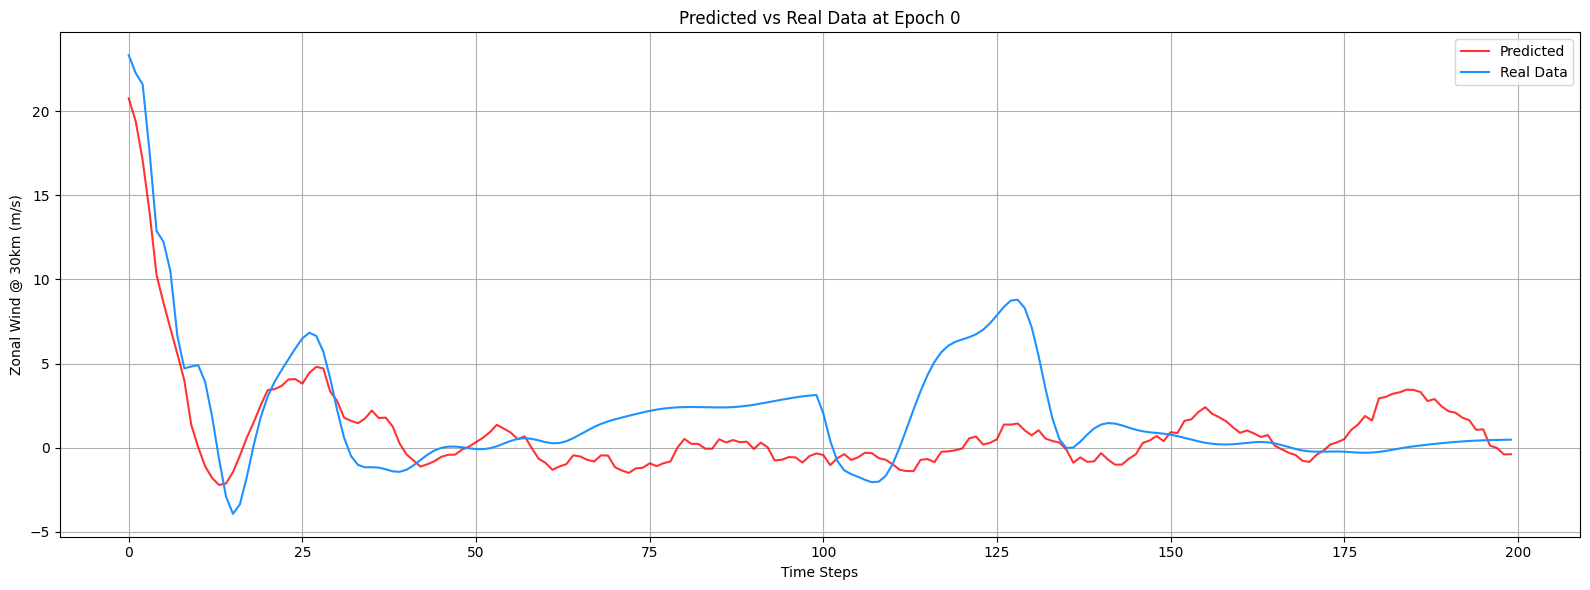

Epoch 2, 
        Reconstrunction Loss: 0.022308403626084328

        Validation Reconstrunction Loss: 0.026620976626873016
Epoch 3, 
        Reconstrunction Loss: 0.020550785586237907

        Validation Reconstrunction Loss: 0.02370089665055275
Epoch 4, 
        Reconstrunction Loss: 0.020641250535845757

        Validation Reconstrunction Loss: 0.0231802798807621
Epoch 5, 
        Reconstrunction Loss: 0.018940815702080727

        Validation Reconstrunction Loss: 0.022611388936638832
Epoch 6, 
        Reconstrunction Loss: 0.01929810270667076

        Validation Reconstrunction Loss: 0.023788779973983765
Epoch 7, 
        Reconstrunction Loss: 0.01865176297724247

        Validation Reconstrunction Loss: 0.021417293697595596
Epoch 8, 
        Reconstrunction Loss: 0.01796370930969715

        Validation Reconstrunction Loss: 0.02189251035451889
Epoch 9, 
        Reconstrunction Loss: 0.017585478723049164

        Validation Reconstrunction Loss: 0.022219592705368996
Epoch 10, 
    

Mini Inference at Epoch 10: 100%|██████████| 200/200 [00:00<00:00, 1282.21it/s]


<Figure size 640x480 with 0 Axes>

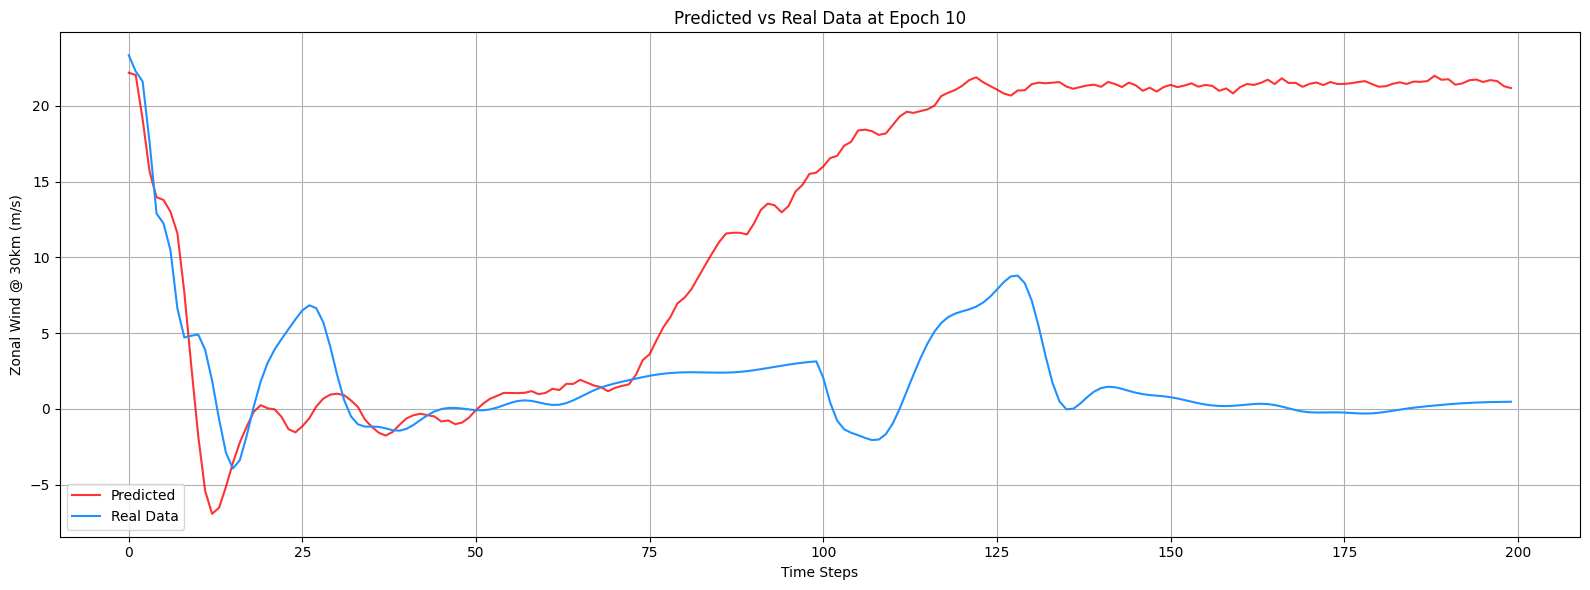

Epoch 12, 
        Reconstrunction Loss: 0.016924632713198662

        Validation Reconstrunction Loss: 0.020277410745620728
Epoch 13, 
        Reconstrunction Loss: 0.016598932445049286

        Validation Reconstrunction Loss: 0.02005399949848652
Epoch 14, 
        Reconstrunction Loss: 0.016950611025094986

        Validation Reconstrunction Loss: 0.02038254402577877
Epoch 15, 
        Reconstrunction Loss: 0.016905568540096283

        Validation Reconstrunction Loss: 0.01868818700313568
Epoch 16, 
        Reconstrunction Loss: 0.016600992530584335

        Validation Reconstrunction Loss: 0.02011941745877266
Epoch 17, 
        Reconstrunction Loss: 0.01668303832411766

        Validation Reconstrunction Loss: 0.018738510087132454
Epoch 18, 
        Reconstrunction Loss: 0.01630239374935627

        Validation Reconstrunction Loss: 0.01922556199133396
Epoch 19, 
        Reconstrunction Loss: 0.01657133363187313

        Validation Reconstrunction Loss: 0.01850973814725876
Epoch 20,

Mini Inference at Epoch 20: 100%|██████████| 200/200 [00:00<00:00, 1104.63it/s]


<Figure size 640x480 with 0 Axes>

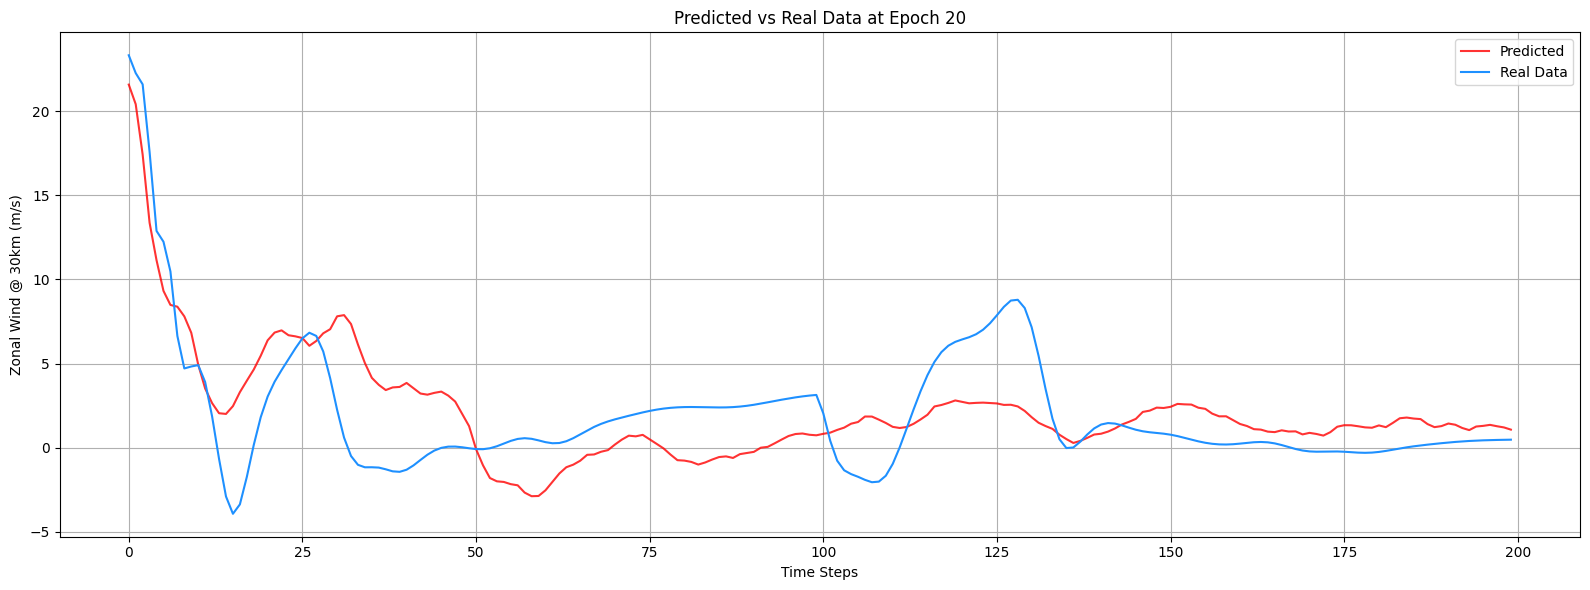

Epoch 22, 
        Reconstrunction Loss: 0.01605789177119732

        Validation Reconstrunction Loss: 0.018530817702412605
Epoch 23, 
        Reconstrunction Loss: 0.016420112922787666

        Validation Reconstrunction Loss: 0.018956389278173447
Epoch 24, 
        Reconstrunction Loss: 0.016227493062615395

        Validation Reconstrunction Loss: 0.018744127824902534
Epoch 25, 
        Reconstrunction Loss: 0.016178332269191742

        Validation Reconstrunction Loss: 0.018079083412885666
Epoch 26, 
        Reconstrunction Loss: 0.016278347000479698

        Validation Reconstrunction Loss: 0.01931305229663849
Epoch 27, 
        Reconstrunction Loss: 0.016051817685365677

        Validation Reconstrunction Loss: 0.018853479996323586
Epoch 28, 
        Reconstrunction Loss: 0.01598566584289074

        Validation Reconstrunction Loss: 0.01814780756831169
Epoch 29, 
        Reconstrunction Loss: 0.01646266132593155

        Validation Reconstrunction Loss: 0.018036771565675735
Epoch

Mini Inference at Epoch 30: 100%|██████████| 200/200 [00:00<00:00, 1151.08it/s]


<Figure size 640x480 with 0 Axes>

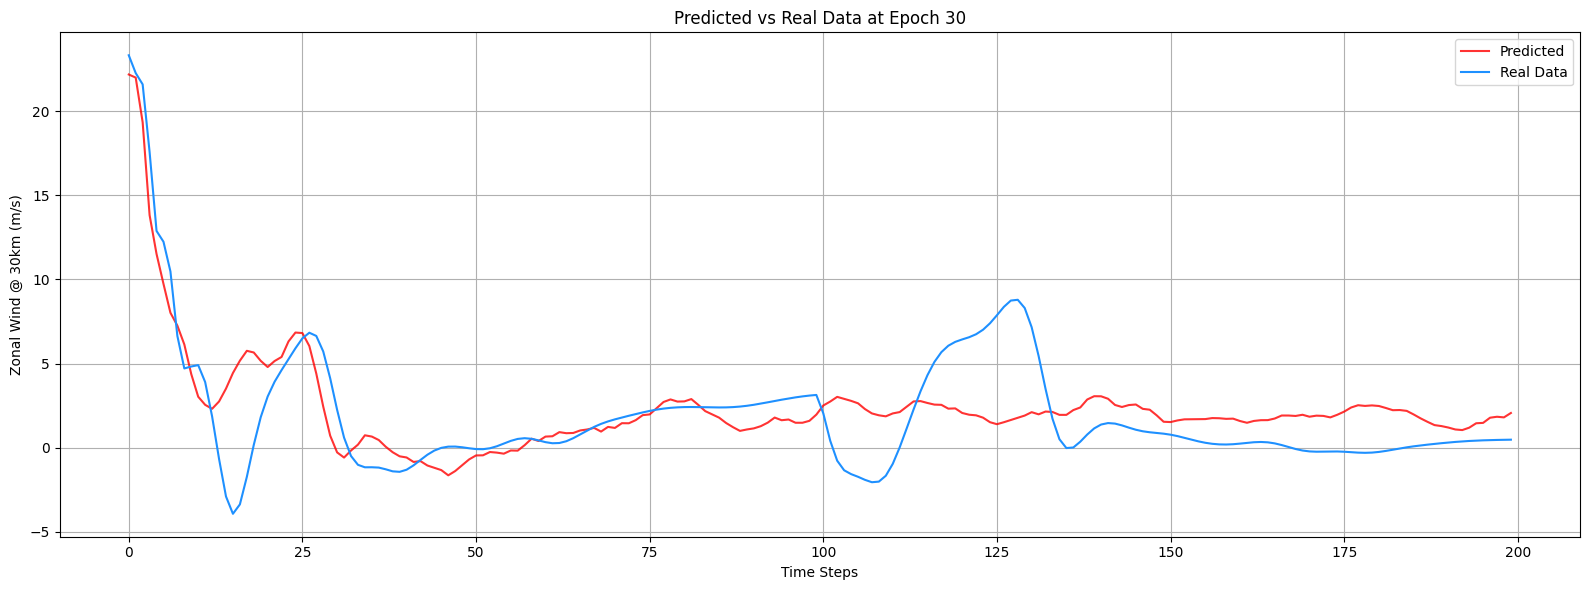

Epoch 32, 
        Reconstrunction Loss: 0.01587035320699215

        Validation Reconstrunction Loss: 0.018337491899728775
Epoch 33, 
        Reconstrunction Loss: 0.016385458409786224

        Validation Reconstrunction Loss: 0.018383780494332314
Epoch 34, 
        Reconstrunction Loss: 0.016394024714827538

        Validation Reconstrunction Loss: 0.01773666962981224
Epoch 35, 
        Reconstrunction Loss: 0.015887951478362083

        Validation Reconstrunction Loss: 0.018034953624010086
Epoch 36, 
        Reconstrunction Loss: 0.015954744070768356

        Validation Reconstrunction Loss: 0.01860247366130352
Epoch 37, 
        Reconstrunction Loss: 0.01594332791864872

        Validation Reconstrunction Loss: 0.01867619901895523
Epoch 38, 
        Reconstrunction Loss: 0.015787161886692047

        Validation Reconstrunction Loss: 0.018115349113941193
Epoch 39, 
        Reconstrunction Loss: 0.015845317393541336

        Validation Reconstrunction Loss: 0.018308736383914948
Epoch

Mini Inference at Epoch 40: 100%|██████████| 200/200 [00:00<00:00, 1299.24it/s]


<Figure size 640x480 with 0 Axes>

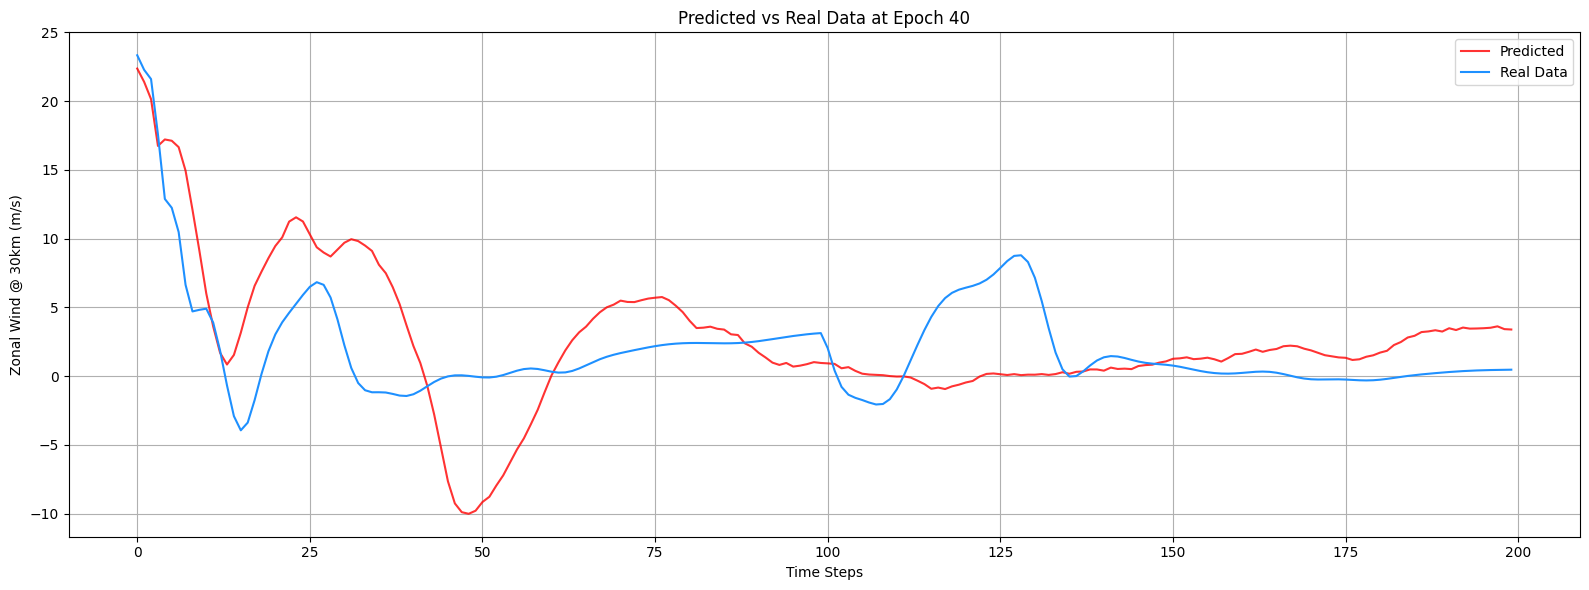

Epoch 42, 
        Reconstrunction Loss: 0.016020452603697777

        Validation Reconstrunction Loss: 0.018522363156080246
Epoch 43, 
        Reconstrunction Loss: 0.015756022185087204

        Validation Reconstrunction Loss: 0.017976244911551476
Epoch 44, 
        Reconstrunction Loss: 0.015971526503562927

        Validation Reconstrunction Loss: 0.018127063289284706
Epoch 45, 
        Reconstrunction Loss: 0.01581457629799843

        Validation Reconstrunction Loss: 0.018301818519830704
Epoch 46, 
        Reconstrunction Loss: 0.0159512497484684

        Validation Reconstrunction Loss: 0.017900727689266205
Epoch 47, 
        Reconstrunction Loss: 0.015765121206641197

        Validation Reconstrunction Loss: 0.018628951162099838
Epoch 48, 
        Reconstrunction Loss: 0.015887364745140076

        Validation Reconstrunction Loss: 0.018164590001106262
Epoch 49, 
        Reconstrunction Loss: 0.015936795622110367

        Validation Reconstrunction Loss: 0.018648913130164146
Epo

Mini Inference at Epoch 50: 100%|██████████| 200/200 [00:00<00:00, 1357.14it/s]


<Figure size 640x480 with 0 Axes>

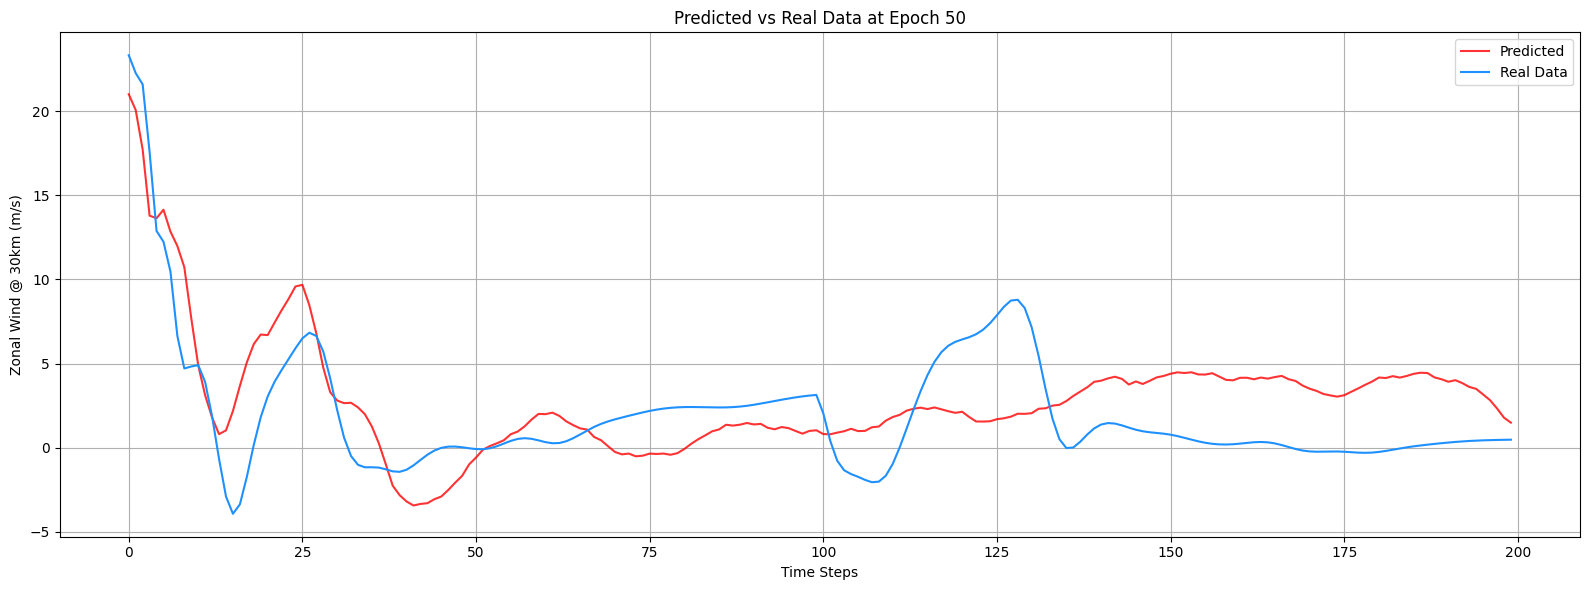

Epoch 52, 
        Reconstrunction Loss: 0.0158705897629261

        Validation Reconstrunction Loss: 0.018534168601036072
Epoch 53, 
        Reconstrunction Loss: 0.015843093395233154

        Validation Reconstrunction Loss: 0.01865491084754467
Epoch 54, 
        Reconstrunction Loss: 0.01565779373049736

        Validation Reconstrunction Loss: 0.017791882157325745
Epoch 55, 
        Reconstrunction Loss: 0.015839949250221252

        Validation Reconstrunction Loss: 0.017787089571356773
Epoch 56, 
        Reconstrunction Loss: 0.015694299712777138

        Validation Reconstrunction Loss: 0.018427524715662003
Epoch 57, 
        Reconstrunction Loss: 0.015815166756510735

        Validation Reconstrunction Loss: 0.018952136859297752
Epoch 58, 
        Reconstrunction Loss: 0.01563362404704094

        Validation Reconstrunction Loss: 0.01819678768515587
Epoch 59, 
        Reconstrunction Loss: 0.015980567783117294

        Validation Reconstrunction Loss: 0.017959944903850555
Epoch 

Mini Inference at Epoch 60: 100%|██████████| 200/200 [00:00<00:00, 707.15it/s]


<Figure size 640x480 with 0 Axes>

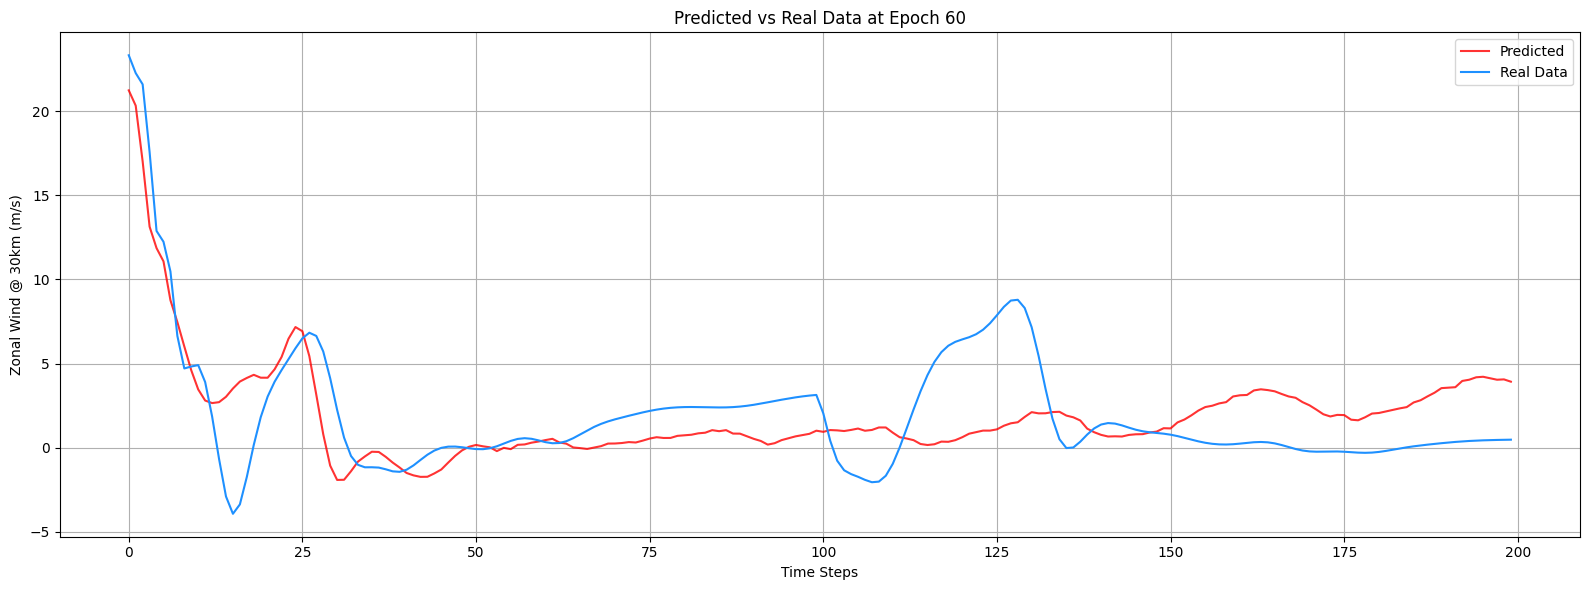

Epoch 62, 
        Reconstrunction Loss: 0.015441354364156723

        Validation Reconstrunction Loss: 0.01791517063975334
Epoch 63, 
        Reconstrunction Loss: 0.015668177977204323

        Validation Reconstrunction Loss: 0.01820410043001175
Epoch 64, 
        Reconstrunction Loss: 0.01590832881629467

        Validation Reconstrunction Loss: 0.018295885995030403
Epoch 65, 
        Reconstrunction Loss: 0.015792153775691986

        Validation Reconstrunction Loss: 0.018345000222325325
Epoch 66, 
        Reconstrunction Loss: 0.015562142245471478

        Validation Reconstrunction Loss: 0.01853356696665287
Epoch 67, 
        Reconstrunction Loss: 0.015402262099087238

        Validation Reconstrunction Loss: 0.01808682084083557
Epoch 68, 
        Reconstrunction Loss: 0.01583436131477356

        Validation Reconstrunction Loss: 0.017753591760993004
Epoch 69, 
        Reconstrunction Loss: 0.01572358049452305

        Validation Reconstrunction Loss: 0.018815234303474426
Epoch 7

Mini Inference at Epoch 70: 100%|██████████| 200/200 [00:00<00:00, 873.52it/s]


<Figure size 640x480 with 0 Axes>

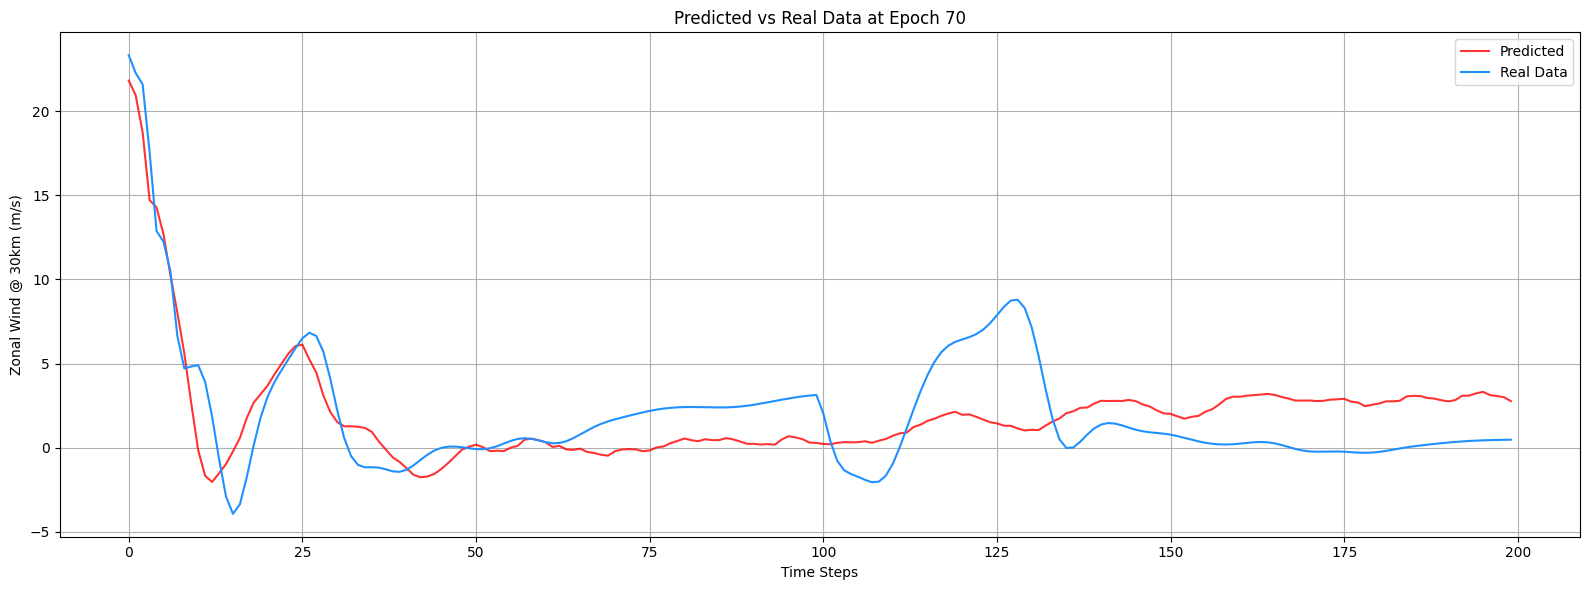

Epoch 72, 
        Reconstrunction Loss: 0.015389567241072655

        Validation Reconstrunction Loss: 0.017745302990078926
Epoch 73, 
        Reconstrunction Loss: 0.015582124702632427

        Validation Reconstrunction Loss: 0.018559010699391365
Epoch 74, 
        Reconstrunction Loss: 0.01555250771343708

        Validation Reconstrunction Loss: 0.018050335347652435
Epoch 75, 
        Reconstrunction Loss: 0.015440691262483597

        Validation Reconstrunction Loss: 0.018204817548394203
Epoch 76, 
        Reconstrunction Loss: 0.015606583096086979

        Validation Reconstrunction Loss: 0.017510542646050453
Epoch 77, 
        Reconstrunction Loss: 0.015696214511990547

        Validation Reconstrunction Loss: 0.01797196827828884
Epoch 78, 
        Reconstrunction Loss: 0.015555094927549362

        Validation Reconstrunction Loss: 0.01790091209113598
Epoch 79, 
        Reconstrunction Loss: 0.015664437785744667

        Validation Reconstrunction Loss: 0.017839496955275536
Epo

Mini Inference at Epoch 80: 100%|██████████| 200/200 [00:00<00:00, 1070.40it/s]


<Figure size 640x480 with 0 Axes>

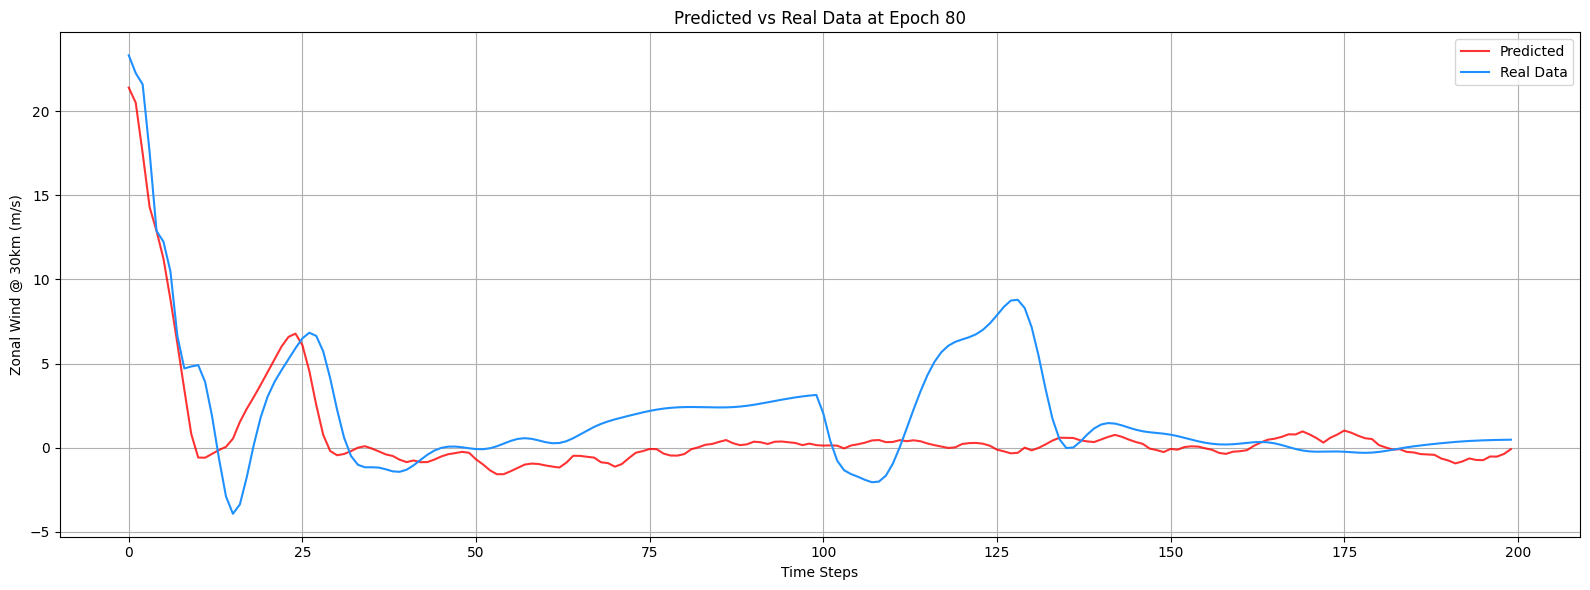

Epoch 82, 
        Reconstrunction Loss: 0.015550621785223484

        Validation Reconstrunction Loss: 0.018093090504407883
Epoch 83, 
        Reconstrunction Loss: 0.0157119520008564

        Validation Reconstrunction Loss: 0.018165800720453262
Epoch 84, 
        Reconstrunction Loss: 0.015471333637833595

        Validation Reconstrunction Loss: 0.018122131004929543
Epoch 85, 
        Reconstrunction Loss: 0.015529721975326538

        Validation Reconstrunction Loss: 0.018068965524435043
Epoch 86, 
        Reconstrunction Loss: 0.015845293179154396

        Validation Reconstrunction Loss: 0.018289832398295403
Epoch 87, 
        Reconstrunction Loss: 0.015339395962655544

        Validation Reconstrunction Loss: 0.01778746210038662
Epoch 88, 
        Reconstrunction Loss: 0.015576368197798729

        Validation Reconstrunction Loss: 0.01768179051578045
Epoch 89, 
        Reconstrunction Loss: 0.015325372107326984

        Validation Reconstrunction Loss: 0.018493084236979485
Epoc

Mini Inference at Epoch 90: 100%|██████████| 200/200 [00:00<00:00, 824.86it/s]


<Figure size 640x480 with 0 Axes>

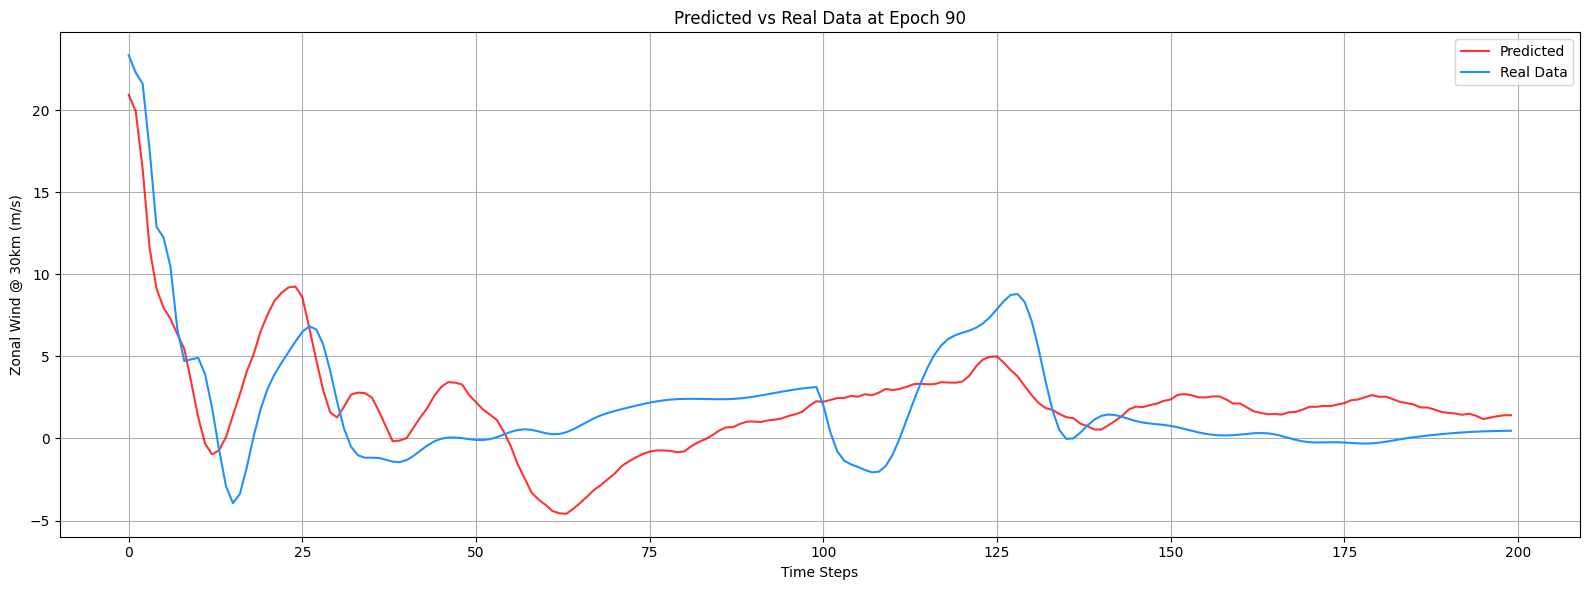

Epoch 92, 
        Reconstrunction Loss: 0.015518133528530598

        Validation Reconstrunction Loss: 0.0180792398750782
Epoch 93, 
        Reconstrunction Loss: 0.015409024432301521

        Validation Reconstrunction Loss: 0.017675483599305153
Epoch 94, 
        Reconstrunction Loss: 0.015438223257660866

        Validation Reconstrunction Loss: 0.018585799261927605
Epoch 95, 
        Reconstrunction Loss: 0.015353458002209663

        Validation Reconstrunction Loss: 0.017555924132466316
Epoch 96, 
        Reconstrunction Loss: 0.015140273608267307

        Validation Reconstrunction Loss: 0.017723480239510536
Epoch 97, 
        Reconstrunction Loss: 0.01550103910267353

        Validation Reconstrunction Loss: 0.018080664798617363
Epoch 98, 
        Reconstrunction Loss: 0.01542227528989315

        Validation Reconstrunction Loss: 0.018373893573880196
Epoch 99, 
        Reconstrunction Loss: 0.015452563762664795

        Validation Reconstrunction Loss: 0.017827657982707024
Epoc

Mini Inference at Epoch 100: 100%|██████████| 200/200 [00:00<00:00, 1083.20it/s]


<Figure size 640x480 with 0 Axes>

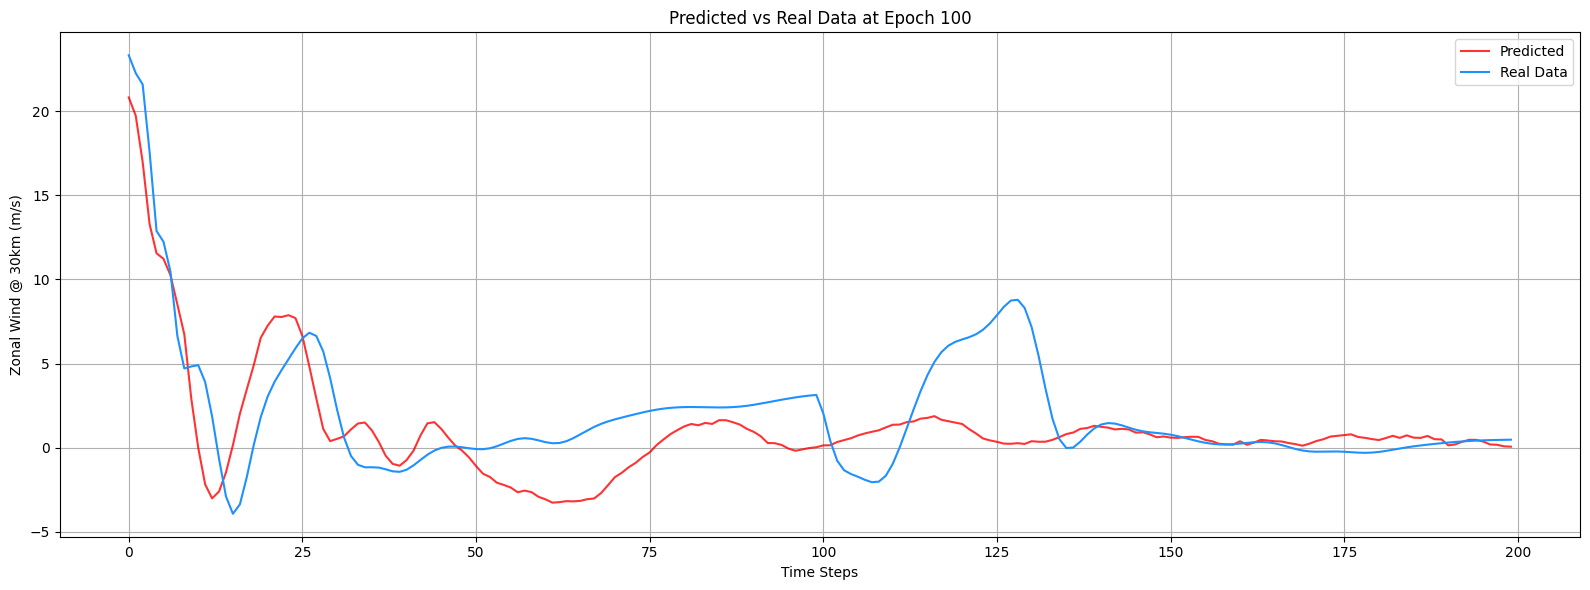

Epoch 102, 
        Reconstrunction Loss: 0.015246999450027943

        Validation Reconstrunction Loss: 0.018183037638664246
Epoch 103, 
        Reconstrunction Loss: 0.015446688048541546

        Validation Reconstrunction Loss: 0.01883924938738346
Epoch 104, 
        Reconstrunction Loss: 0.015389895997941494

        Validation Reconstrunction Loss: 0.01834396831691265
Epoch 105, 
        Reconstrunction Loss: 0.015160606242716312

        Validation Reconstrunction Loss: 0.017604466527700424
Epoch 106, 
        Reconstrunction Loss: 0.015336846932768822

        Validation Reconstrunction Loss: 0.017429329454898834
Epoch 107, 
        Reconstrunction Loss: 0.015584096312522888

        Validation Reconstrunction Loss: 0.017944999039173126
Epoch 108, 
        Reconstrunction Loss: 0.015412638895213604

        Validation Reconstrunction Loss: 0.017813172191381454
Epoch 109, 
        Reconstrunction Loss: 0.015240196138620377

        Validation Reconstrunction Loss: 0.0179404094815

Mini Inference at Epoch 110: 100%|██████████| 200/200 [00:00<00:00, 1293.30it/s]


<Figure size 640x480 with 0 Axes>

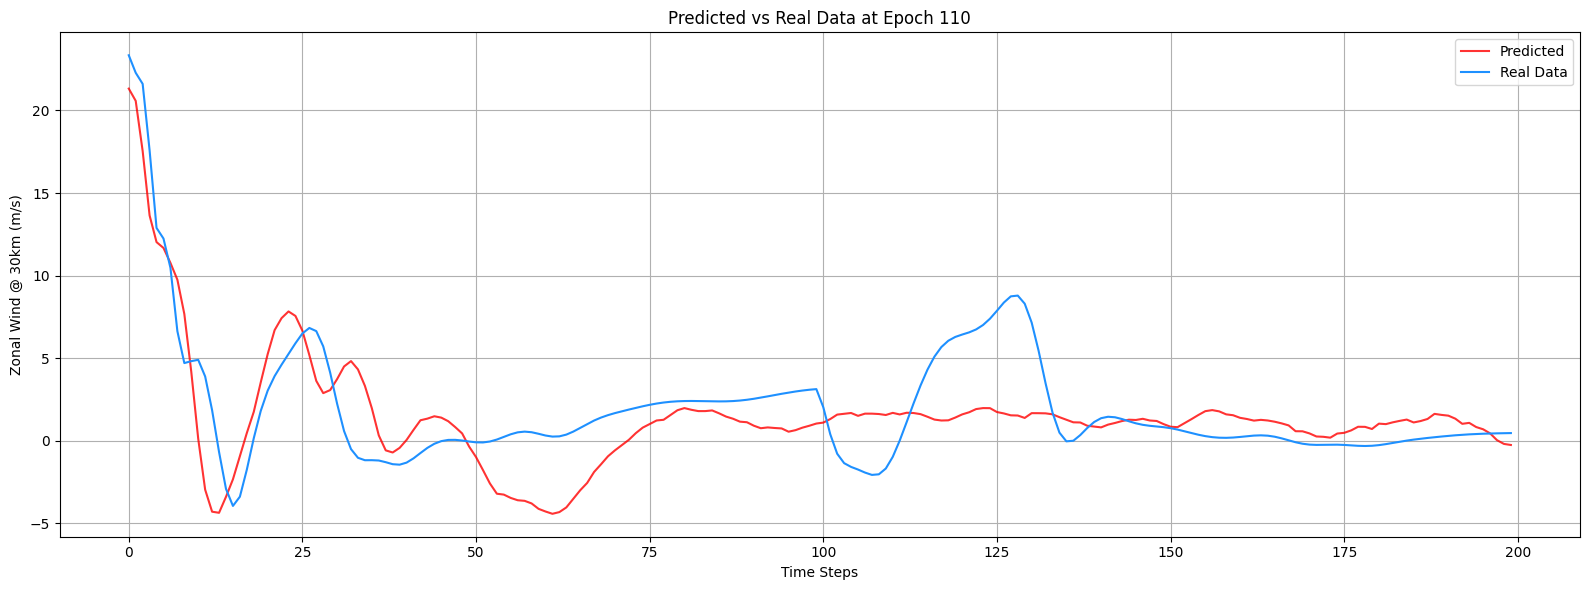

Epoch 112, 
        Reconstrunction Loss: 0.015303732827305794

        Validation Reconstrunction Loss: 0.0181372482329607
Epoch 113, 
        Reconstrunction Loss: 0.015612836927175522

        Validation Reconstrunction Loss: 0.017885606735944748
Epoch 114, 
        Reconstrunction Loss: 0.015501143410801888

        Validation Reconstrunction Loss: 0.017717642709612846
Epoch 115, 
        Reconstrunction Loss: 0.015417692251503468

        Validation Reconstrunction Loss: 0.01839541085064411
Epoch 116, 
        Reconstrunction Loss: 0.015324863605201244

        Validation Reconstrunction Loss: 0.018028011545538902
Epoch 117, 
        Reconstrunction Loss: 0.015189005061984062

        Validation Reconstrunction Loss: 0.01800873875617981
Epoch 118, 
        Reconstrunction Loss: 0.015448243357241154

        Validation Reconstrunction Loss: 0.01846453547477722
Epoch 119, 
        Reconstrunction Loss: 0.0154245151206851

        Validation Reconstrunction Loss: 0.017913207411766052

Mini Inference at Epoch 120: 100%|██████████| 200/200 [00:00<00:00, 1306.66it/s]


<Figure size 640x480 with 0 Axes>

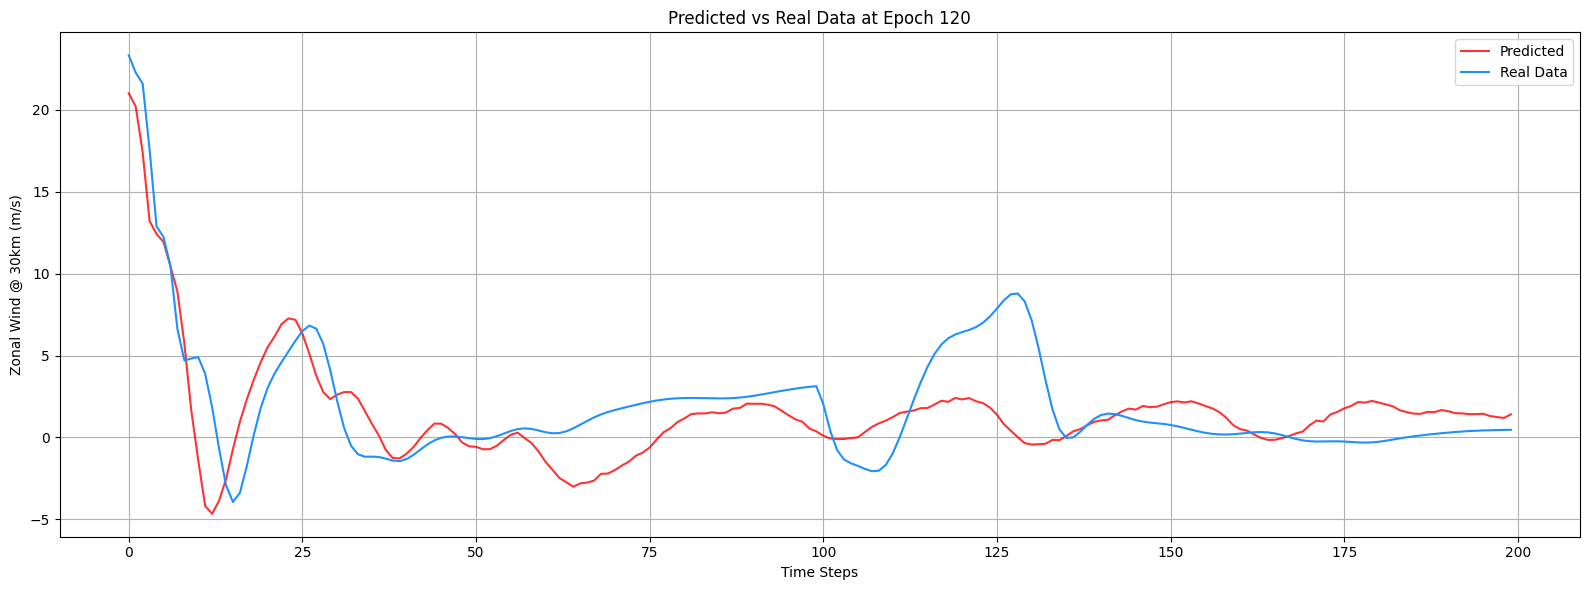

Epoch 122, 
        Reconstrunction Loss: 0.015444760210812092

        Validation Reconstrunction Loss: 0.017725840210914612
Epoch 123, 
        Reconstrunction Loss: 0.015391415916383266

        Validation Reconstrunction Loss: 0.017382286489009857
Epoch 124, 
        Reconstrunction Loss: 0.015565467067062855

        Validation Reconstrunction Loss: 0.017829114571213722
Epoch 125, 
        Reconstrunction Loss: 0.015242421999573708

        Validation Reconstrunction Loss: 0.01794457621872425
Epoch 126, 
        Reconstrunction Loss: 0.015515710227191448

        Validation Reconstrunction Loss: 0.017586112022399902
Epoch 127, 
        Reconstrunction Loss: 0.015120034106075764

        Validation Reconstrunction Loss: 0.017786702141165733
Epoch 128, 
        Reconstrunction Loss: 0.015278558246791363

        Validation Reconstrunction Loss: 0.017611749470233917
Epoch 129, 
        Reconstrunction Loss: 0.015339951030910015

        Validation Reconstrunction Loss: 0.018035005778

Mini Inference at Epoch 130: 100%|██████████| 200/200 [00:00<00:00, 1309.73it/s]


<Figure size 640x480 with 0 Axes>

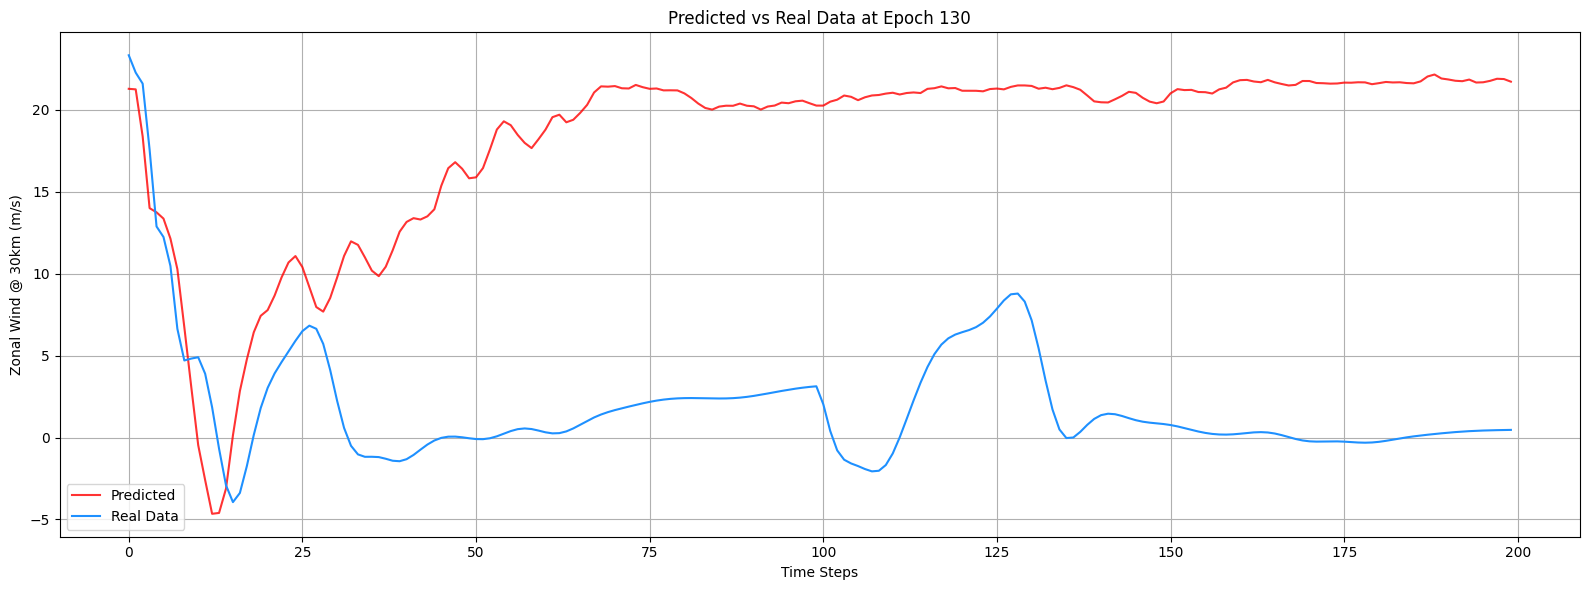

Epoch 132, 
        Reconstrunction Loss: 0.015280909836292267

        Validation Reconstrunction Loss: 0.017415132373571396
Epoch 133, 
        Reconstrunction Loss: 0.015304937958717346

        Validation Reconstrunction Loss: 0.017816010862588882
Epoch 134, 
        Reconstrunction Loss: 0.01548177469521761

        Validation Reconstrunction Loss: 0.017384544014930725
Epoch 135, 
        Reconstrunction Loss: 0.01536283828318119

        Validation Reconstrunction Loss: 0.017860334366559982
Epoch 136, 
        Reconstrunction Loss: 0.015249845571815968

        Validation Reconstrunction Loss: 0.017827337607741356
Epoch 137, 
        Reconstrunction Loss: 0.01499274279922247

        Validation Reconstrunction Loss: 0.01782391406595707
Epoch 138, 
        Reconstrunction Loss: 0.015448746271431446

        Validation Reconstrunction Loss: 0.017132846638560295
Epoch 139, 
        Reconstrunction Loss: 0.015440400689840317

        Validation Reconstrunction Loss: 0.017503326758742

Mini Inference at Epoch 140: 100%|██████████| 200/200 [00:00<00:00, 1356.76it/s]


<Figure size 640x480 with 0 Axes>

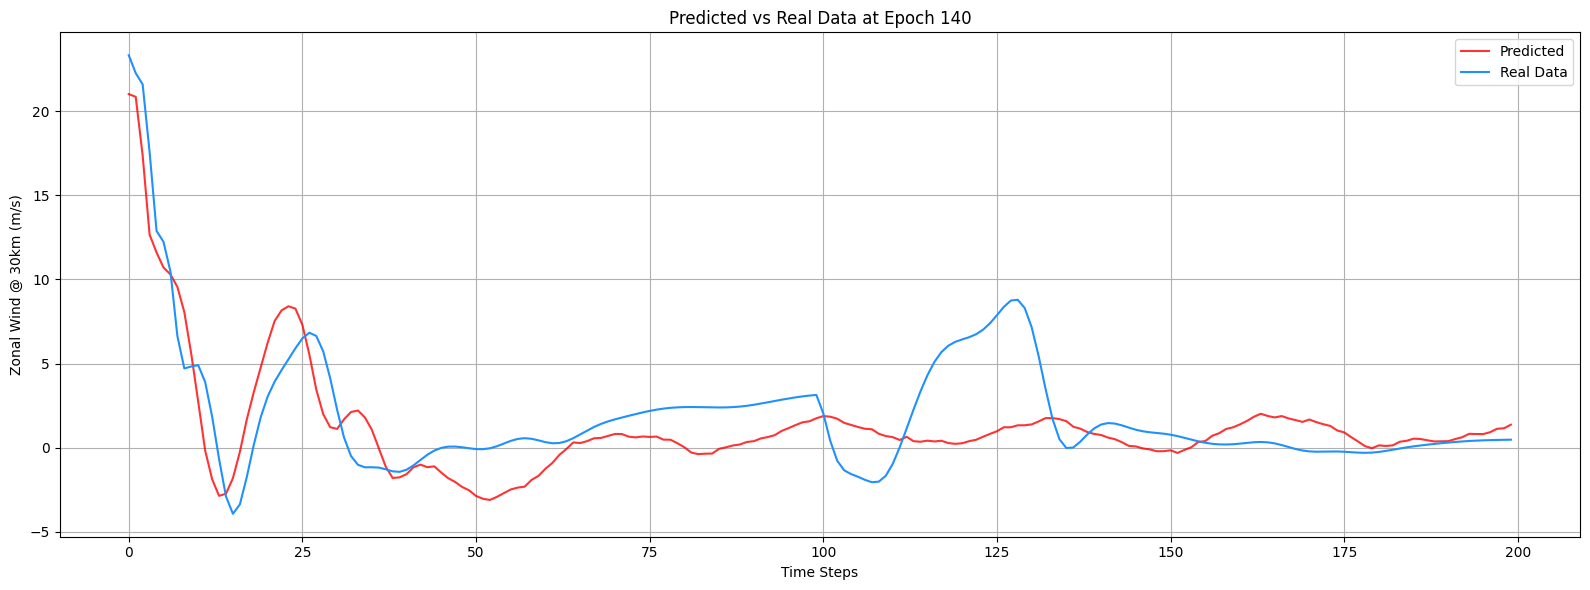

Epoch 142, 
        Reconstrunction Loss: 0.015228805132210255

        Validation Reconstrunction Loss: 0.01714886911213398
Epoch 143, 
        Reconstrunction Loss: 0.015375043265521526

        Validation Reconstrunction Loss: 0.01736445352435112
Epoch 144, 
        Reconstrunction Loss: 0.01552555337548256

        Validation Reconstrunction Loss: 0.01789657026529312
Epoch 145, 
        Reconstrunction Loss: 0.015315358527004719

        Validation Reconstrunction Loss: 0.0177929550409317
Epoch 146, 
        Reconstrunction Loss: 0.015391756780445576

        Validation Reconstrunction Loss: 0.018039202317595482
Epoch 147, 
        Reconstrunction Loss: 0.015356292016804218

        Validation Reconstrunction Loss: 0.0174725241959095
Epoch 148, 
        Reconstrunction Loss: 0.015371102839708328

        Validation Reconstrunction Loss: 0.01736488938331604
Epoch 149, 
        Reconstrunction Loss: 0.01526633556932211

        Validation Reconstrunction Loss: 0.01732899434864521
Epo

Mini Inference at Epoch 150: 100%|██████████| 200/200 [00:00<00:00, 1162.41it/s]


<Figure size 640x480 with 0 Axes>

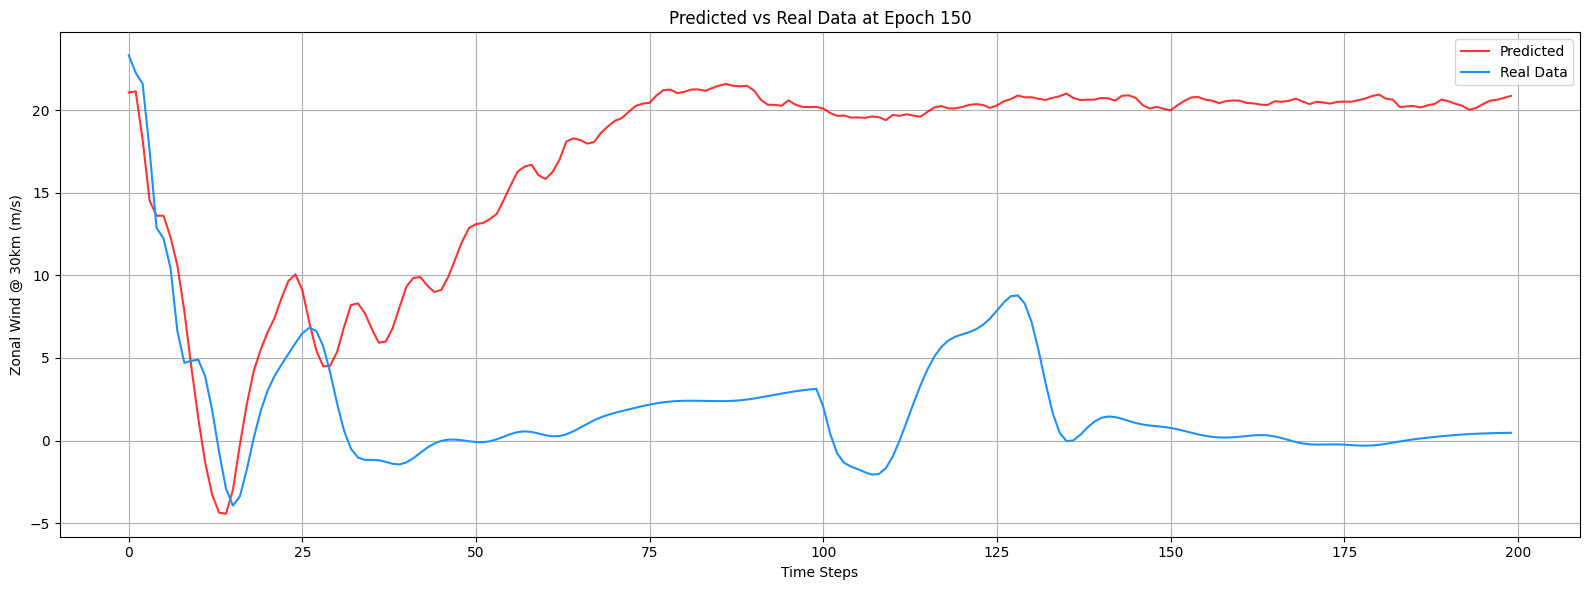

Epoch 152, 
        Reconstrunction Loss: 0.015235917642712593

        Validation Reconstrunction Loss: 0.017099149525165558
Epoch 153, 
        Reconstrunction Loss: 0.015381241217255592

        Validation Reconstrunction Loss: 0.01796627603471279
Epoch 154, 
        Reconstrunction Loss: 0.015481427311897278

        Validation Reconstrunction Loss: 0.01737690158188343
Epoch 155, 
        Reconstrunction Loss: 0.015329452231526375

        Validation Reconstrunction Loss: 0.017304223030805588
Epoch 156, 
        Reconstrunction Loss: 0.015351169742643833

        Validation Reconstrunction Loss: 0.01752312108874321
Epoch 157, 
        Reconstrunction Loss: 0.015315298922359943

        Validation Reconstrunction Loss: 0.017025742679834366
Epoch 158, 
        Reconstrunction Loss: 0.015340748243033886

        Validation Reconstrunction Loss: 0.017592675983905792
Epoch 159, 
        Reconstrunction Loss: 0.015099987387657166

        Validation Reconstrunction Loss: 0.01670773699879

Mini Inference at Epoch 160: 100%|██████████| 200/200 [00:00<00:00, 1225.13it/s]


<Figure size 640x480 with 0 Axes>

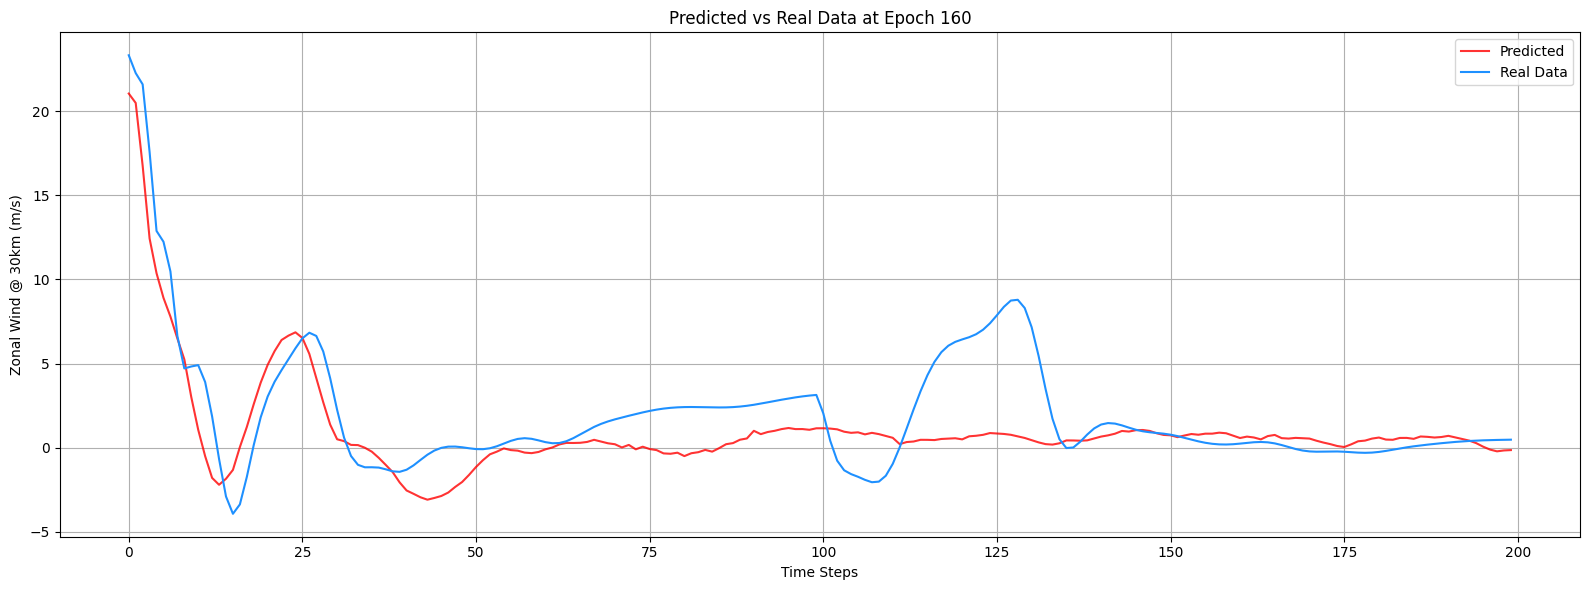

Epoch 162, 
        Reconstrunction Loss: 0.015413371846079826

        Validation Reconstrunction Loss: 0.018061885610222816
Epoch 163, 
        Reconstrunction Loss: 0.015268607996404171

        Validation Reconstrunction Loss: 0.017043551430106163
Epoch 164, 
        Reconstrunction Loss: 0.015276473015546799

        Validation Reconstrunction Loss: 0.017315084114670753
Epoch 165, 
        Reconstrunction Loss: 0.015306849032640457

        Validation Reconstrunction Loss: 0.017258401960134506
Epoch 166, 
        Reconstrunction Loss: 0.0151588199660182

        Validation Reconstrunction Loss: 0.016893921419978142
Epoch 167, 
        Reconstrunction Loss: 0.015246693976223469

        Validation Reconstrunction Loss: 0.017300087958574295
Epoch 168, 
        Reconstrunction Loss: 0.015344514511525631

        Validation Reconstrunction Loss: 0.01707116700708866
Epoch 169, 
        Reconstrunction Loss: 0.015219224616885185

        Validation Reconstrunction Loss: 0.01705820485949

Mini Inference at Epoch 170: 100%|██████████| 200/200 [00:00<00:00, 422.49it/s]


<Figure size 640x480 with 0 Axes>

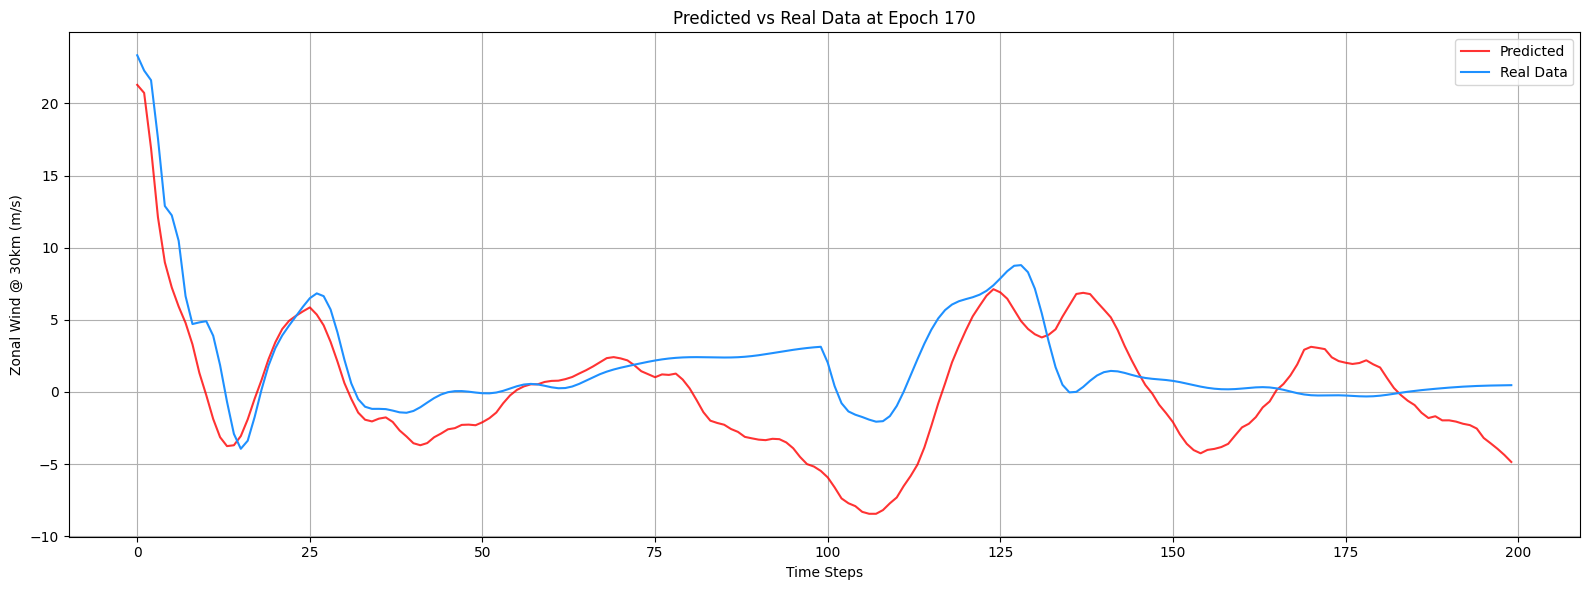

Epoch 172, 
        Reconstrunction Loss: 0.01516385655850172

        Validation Reconstrunction Loss: 0.01684875227510929
Epoch 173, 
        Reconstrunction Loss: 0.015452248975634575

        Validation Reconstrunction Loss: 0.017470108345150948
Epoch 174, 
        Reconstrunction Loss: 0.01526689063757658

        Validation Reconstrunction Loss: 0.017165711149573326
Epoch 175, 
        Reconstrunction Loss: 0.015277181752026081

        Validation Reconstrunction Loss: 0.017497094348073006
Epoch 176, 
        Reconstrunction Loss: 0.015310622751712799

        Validation Reconstrunction Loss: 0.01779904216527939
Epoch 177, 
        Reconstrunction Loss: 0.015268664807081223

        Validation Reconstrunction Loss: 0.01746188849210739
Epoch 178, 
        Reconstrunction Loss: 0.015212669968605042

        Validation Reconstrunction Loss: 0.01831817999482155
Epoch 179, 
        Reconstrunction Loss: 0.015178801491856575

        Validation Reconstrunction Loss: 0.01766648702323436

Mini Inference at Epoch 180: 100%|██████████| 200/200 [00:00<00:00, 1298.72it/s]


<Figure size 640x480 with 0 Axes>

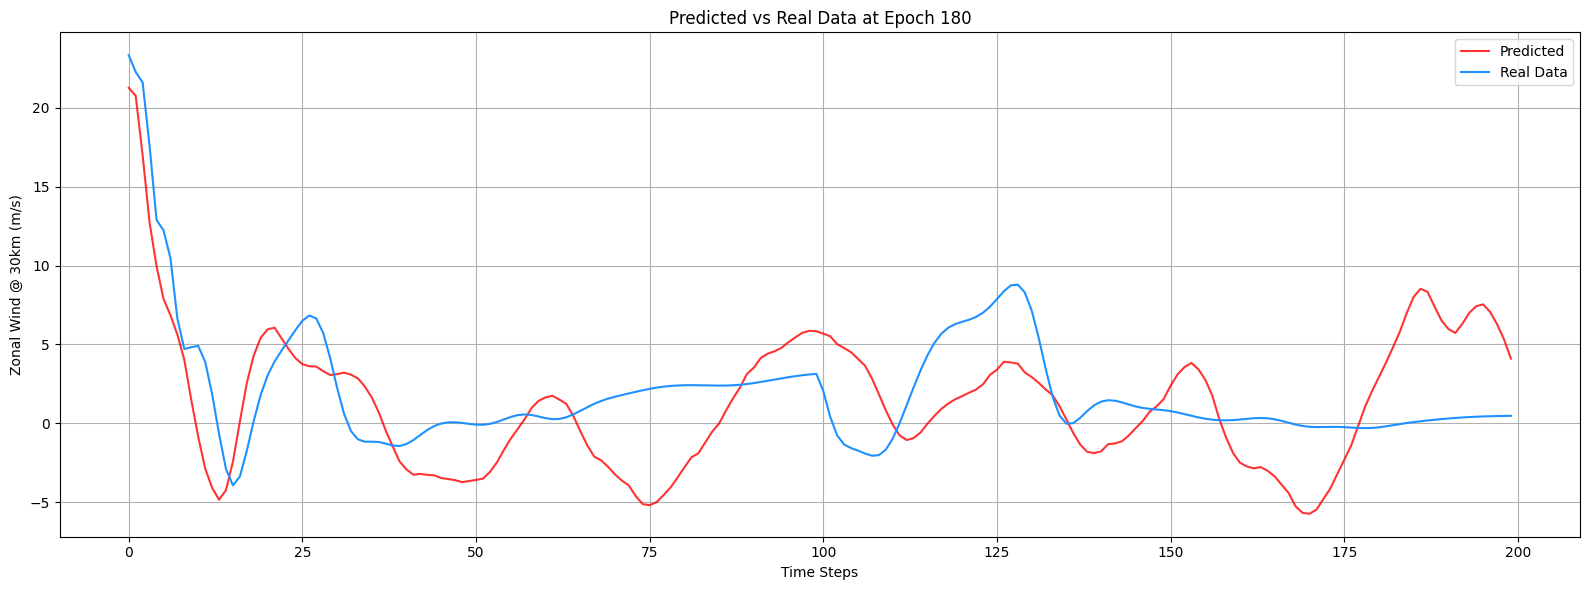

Epoch 182, 
        Reconstrunction Loss: 0.015119059011340141

        Validation Reconstrunction Loss: 0.01727188006043434
Epoch 183, 
        Reconstrunction Loss: 0.015282093547284603

        Validation Reconstrunction Loss: 0.01710723340511322
Epoch 184, 
        Reconstrunction Loss: 0.015240082517266273

        Validation Reconstrunction Loss: 0.016819169744849205
Epoch 185, 
        Reconstrunction Loss: 0.015232434496283531

        Validation Reconstrunction Loss: 0.01729019172489643
Epoch 186, 
        Reconstrunction Loss: 0.015168041922152042

        Validation Reconstrunction Loss: 0.017440730705857277
Epoch 187, 
        Reconstrunction Loss: 0.015053169801831245

        Validation Reconstrunction Loss: 0.017091354355216026
Epoch 188, 
        Reconstrunction Loss: 0.01510018203407526

        Validation Reconstrunction Loss: 0.01741662062704563
Epoch 189, 
        Reconstrunction Loss: 0.015181638300418854

        Validation Reconstrunction Loss: 0.0175756216049194

Mini Inference at Epoch 190: 100%|██████████| 200/200 [00:00<00:00, 1261.70it/s]


<Figure size 640x480 with 0 Axes>

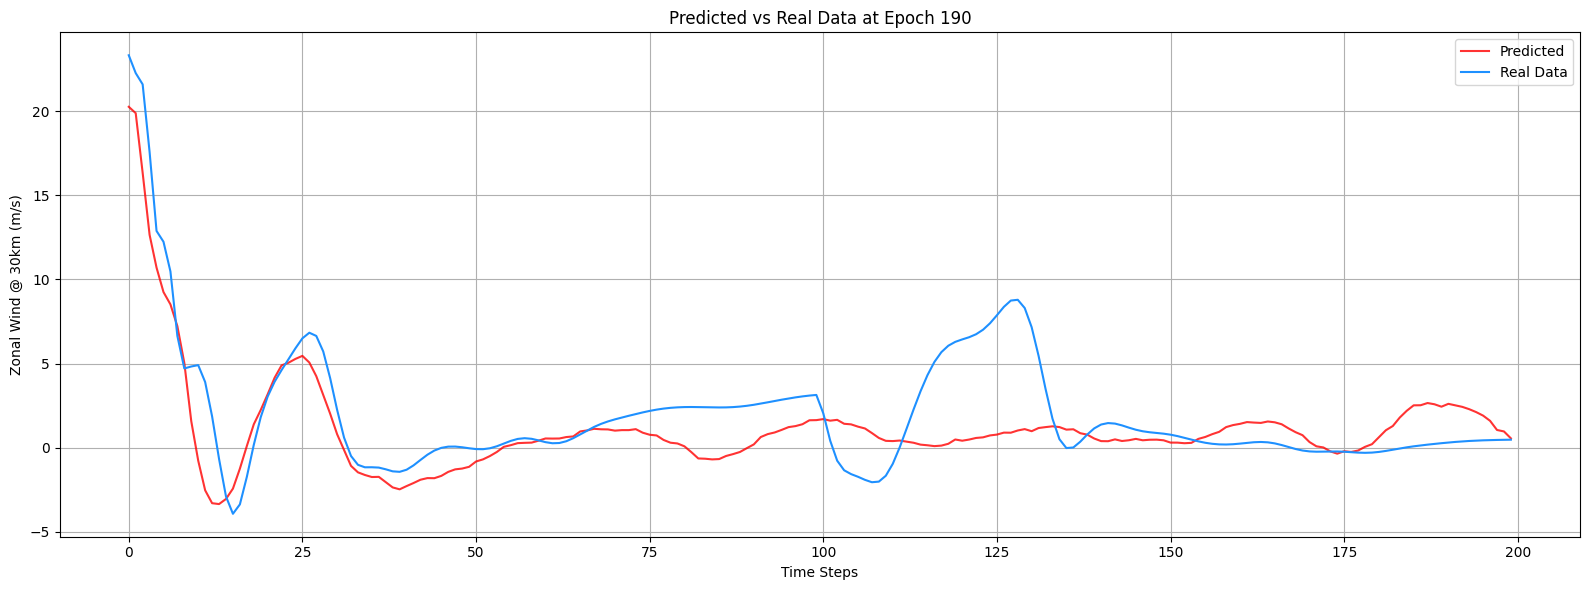

Epoch 192, 
        Reconstrunction Loss: 0.01507095992565155

        Validation Reconstrunction Loss: 0.017575202509760857
Epoch 193, 
        Reconstrunction Loss: 0.015202205628156662

        Validation Reconstrunction Loss: 0.017494264990091324
Epoch 194, 
        Reconstrunction Loss: 0.015331292524933815

        Validation Reconstrunction Loss: 0.016991259530186653
Epoch 195, 
        Reconstrunction Loss: 0.015170698054134846

        Validation Reconstrunction Loss: 0.017329562455415726
Epoch 196, 
        Reconstrunction Loss: 0.015370341017842293

        Validation Reconstrunction Loss: 0.01762276142835617
Epoch 197, 
        Reconstrunction Loss: 0.015137335285544395

        Validation Reconstrunction Loss: 0.01723363995552063
Epoch 198, 
        Reconstrunction Loss: 0.015160334296524525

        Validation Reconstrunction Loss: 0.017632748931646347
Epoch 199, 
        Reconstrunction Loss: 0.015290413983166218

        Validation Reconstrunction Loss: 0.01776761002838

Mini Inference at Epoch 200: 100%|██████████| 200/200 [00:00<00:00, 1244.43it/s]


<Figure size 640x480 with 0 Axes>

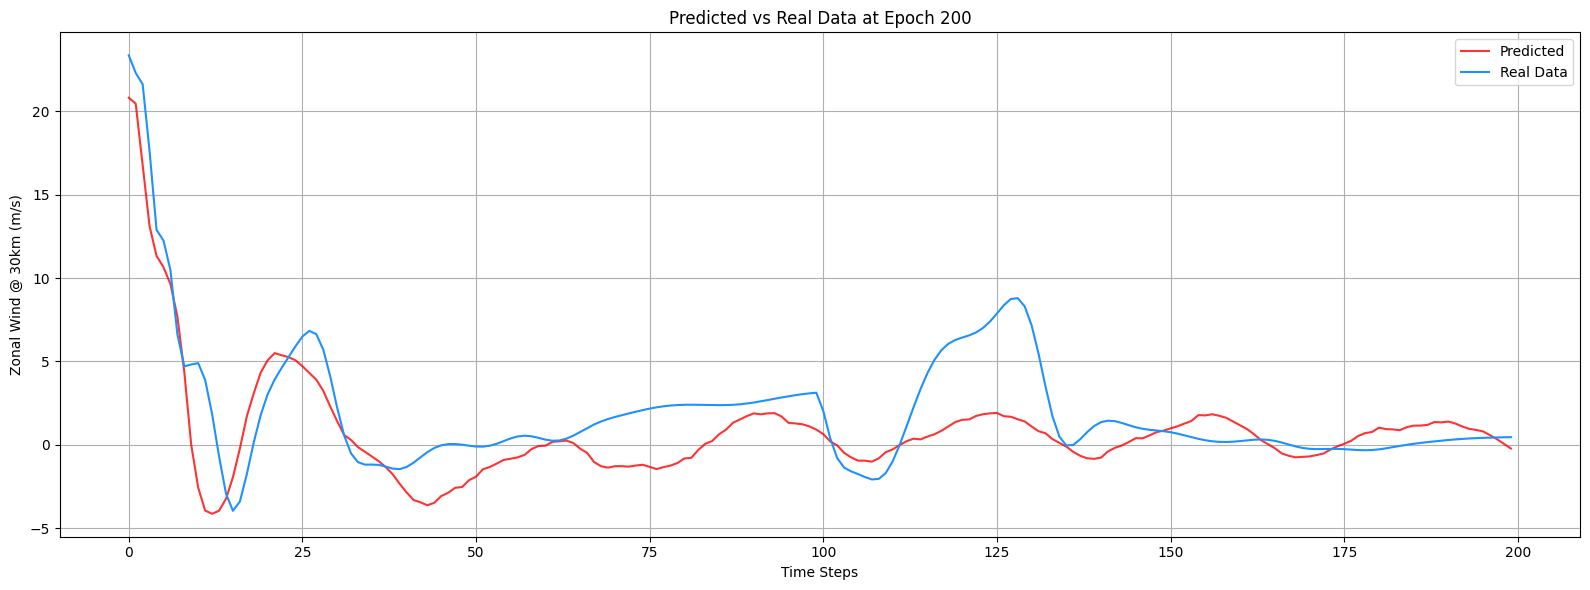

Epoch 202, 
        Reconstrunction Loss: 0.015288114547729492

        Validation Reconstrunction Loss: 0.01716582104563713
Epoch 203, 
        Reconstrunction Loss: 0.015230649150907993

        Validation Reconstrunction Loss: 0.01737850531935692
Epoch 204, 
        Reconstrunction Loss: 0.015113603323698044

        Validation Reconstrunction Loss: 0.017418501898646355
Epoch 205, 
        Reconstrunction Loss: 0.015153566375374794

        Validation Reconstrunction Loss: 0.017407724633812904
Epoch 206, 
        Reconstrunction Loss: 0.015091807581484318

        Validation Reconstrunction Loss: 0.01740594021975994
Epoch 207, 
        Reconstrunction Loss: 0.015402667224407196

        Validation Reconstrunction Loss: 0.017144417390227318
Epoch 208, 
        Reconstrunction Loss: 0.015325786545872688

        Validation Reconstrunction Loss: 0.017203371971845627
Epoch 209, 
        Reconstrunction Loss: 0.015329865738749504

        Validation Reconstrunction Loss: 0.01706247590482

Mini Inference at Epoch 210: 100%|██████████| 200/200 [00:00<00:00, 1223.03it/s]


<Figure size 640x480 with 0 Axes>

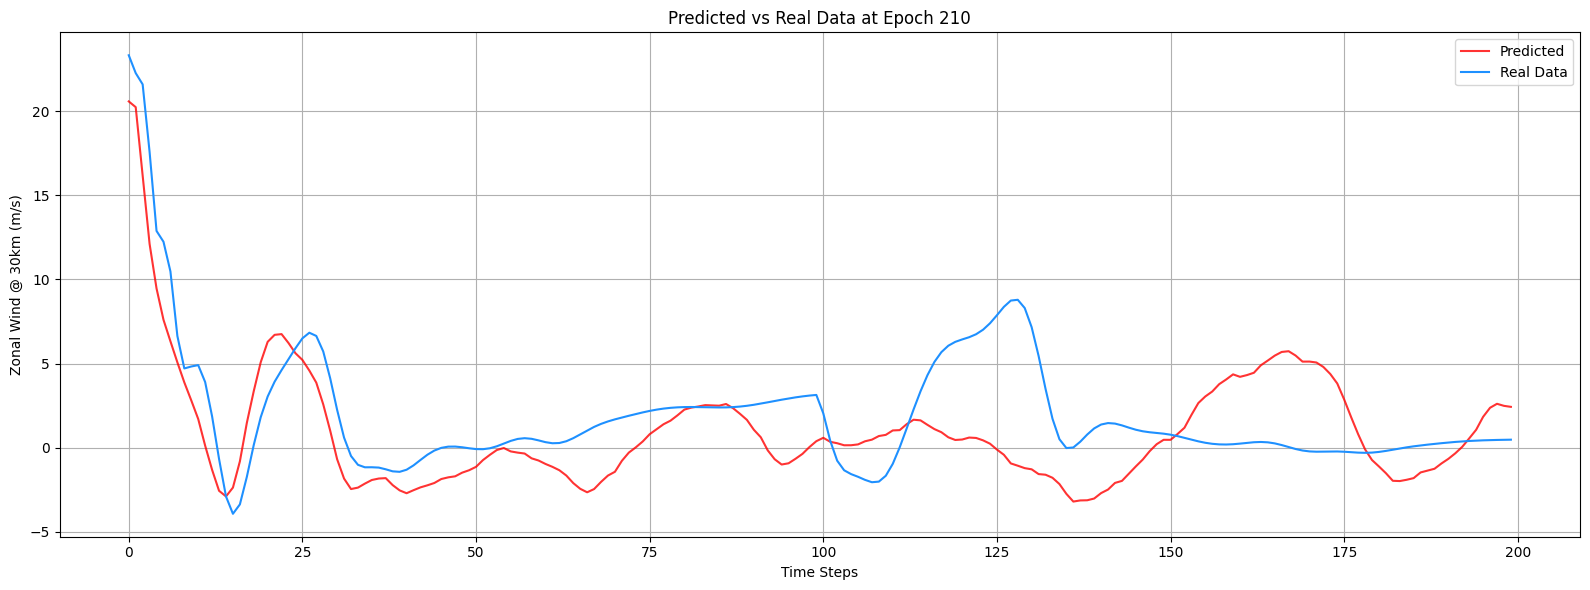

Epoch 212, 
        Reconstrunction Loss: 0.015128613449633121

        Validation Reconstrunction Loss: 0.017550110816955566
Epoch 213, 
        Reconstrunction Loss: 0.015208923257887363

        Validation Reconstrunction Loss: 0.017290087416768074
Epoch 214, 
        Reconstrunction Loss: 0.015003125183284283

        Validation Reconstrunction Loss: 0.016702912747859955
Epoch 215, 
        Reconstrunction Loss: 0.015235934406518936

        Validation Reconstrunction Loss: 0.017659353092312813
Epoch 216, 
        Reconstrunction Loss: 0.015095901675522327

        Validation Reconstrunction Loss: 0.01749962568283081
Epoch 217, 
        Reconstrunction Loss: 0.01532443892210722

        Validation Reconstrunction Loss: 0.017416587099432945
Epoch 218, 
        Reconstrunction Loss: 0.015264575369656086

        Validation Reconstrunction Loss: 0.017714103683829308
Epoch 219, 
        Reconstrunction Loss: 0.015117486007511616

        Validation Reconstrunction Loss: 0.0180719774216

Mini Inference at Epoch 220: 100%|██████████| 200/200 [00:00<00:00, 1080.41it/s]


<Figure size 640x480 with 0 Axes>

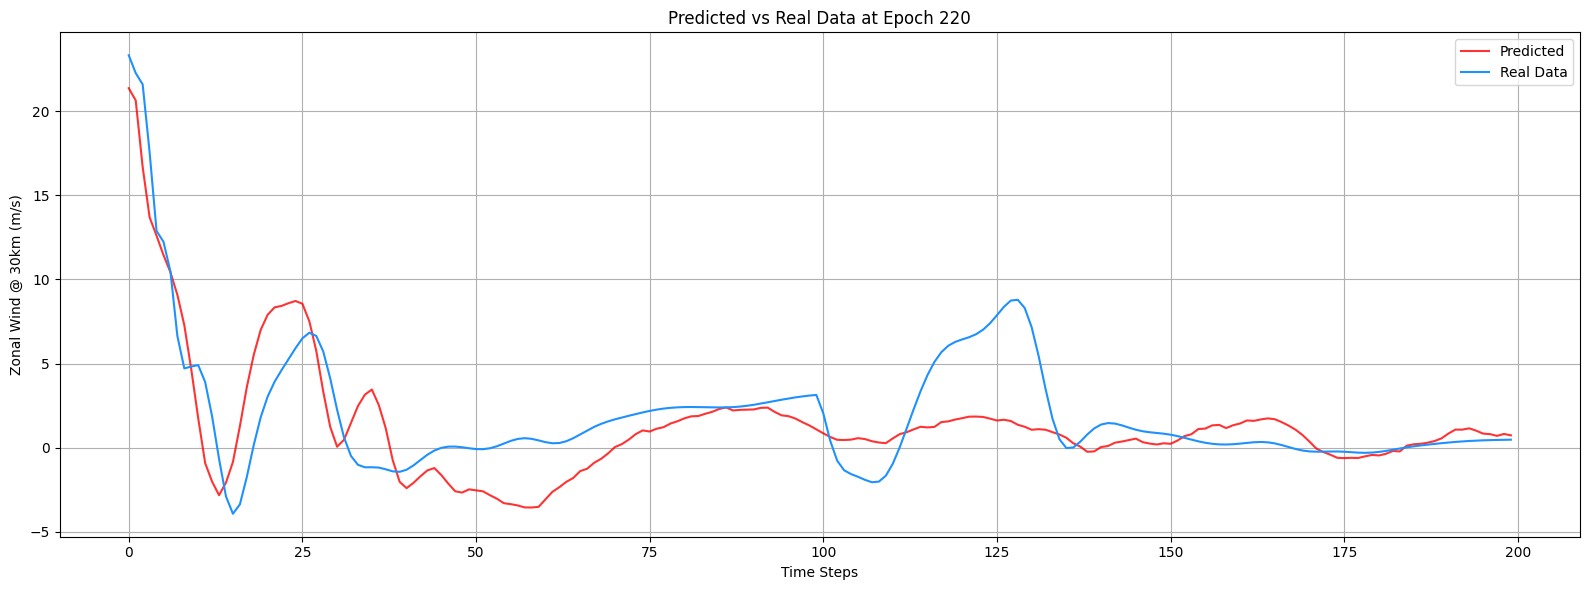

Epoch 222, 
        Reconstrunction Loss: 0.015163489617407322

        Validation Reconstrunction Loss: 0.017291801050305367
Epoch 223, 
        Reconstrunction Loss: 0.015225190669298172

        Validation Reconstrunction Loss: 0.017537696287035942
Epoch 224, 
        Reconstrunction Loss: 0.014954114332795143

        Validation Reconstrunction Loss: 0.01754319667816162
Epoch 225, 
        Reconstrunction Loss: 0.015131724067032337

        Validation Reconstrunction Loss: 0.016763217747211456
Epoch 226, 
        Reconstrunction Loss: 0.0152206439524889

        Validation Reconstrunction Loss: 0.01784907467663288
Epoch 227, 
        Reconstrunction Loss: 0.015092000365257263

        Validation Reconstrunction Loss: 0.01699960231781006
Epoch 228, 
        Reconstrunction Loss: 0.015144909732043743

        Validation Reconstrunction Loss: 0.01729239709675312
Epoch 229, 
        Reconstrunction Loss: 0.015168595127761364

        Validation Reconstrunction Loss: 0.01702002994716167

Mini Inference at Epoch 230: 100%|██████████| 200/200 [00:00<00:00, 1064.12it/s]


<Figure size 640x480 with 0 Axes>

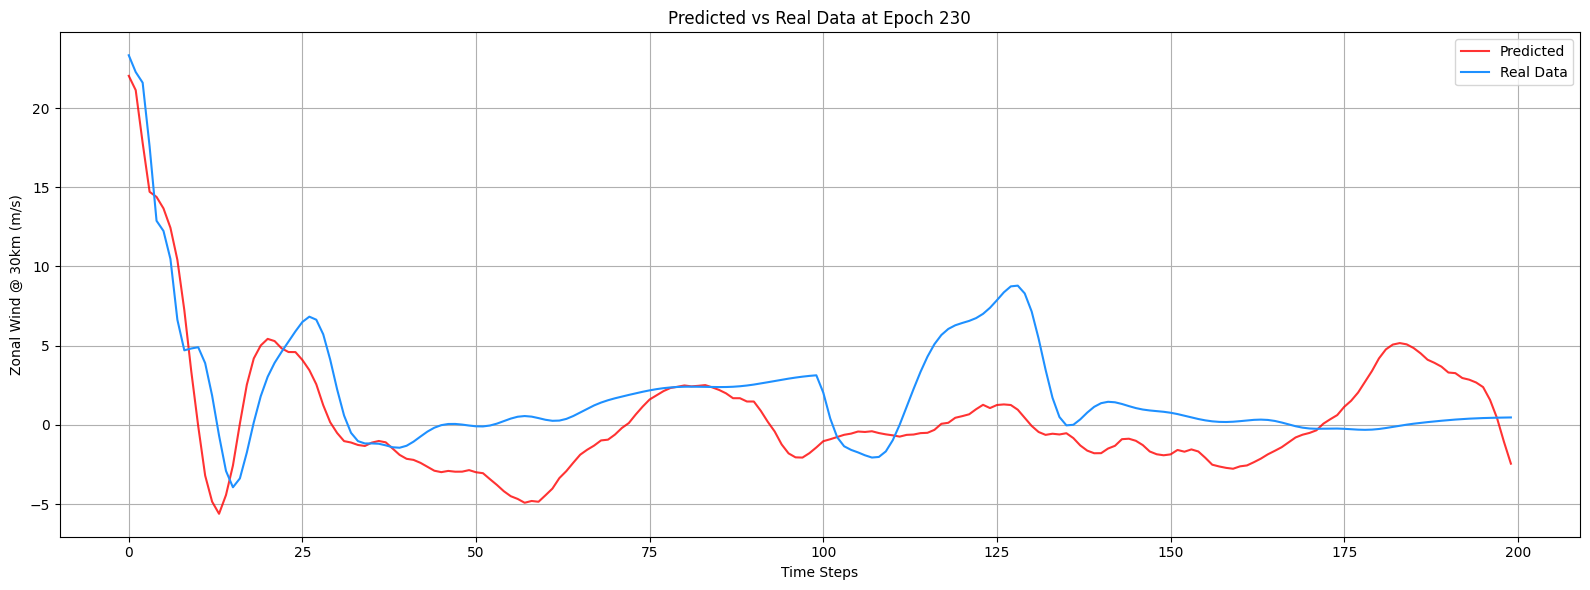

Epoch 232, 
        Reconstrunction Loss: 0.015151546336710453

        Validation Reconstrunction Loss: 0.01714038848876953
Epoch 233, 
        Reconstrunction Loss: 0.015149184502661228

        Validation Reconstrunction Loss: 0.017358392477035522
Epoch 234, 
        Reconstrunction Loss: 0.0151245491579175

        Validation Reconstrunction Loss: 0.0174697358161211
Epoch 235, 
        Reconstrunction Loss: 0.015270762145519257

        Validation Reconstrunction Loss: 0.01711192913353443
Epoch 236, 
        Reconstrunction Loss: 0.015064376406371593

        Validation Reconstrunction Loss: 0.017112715169787407
Epoch 237, 
        Reconstrunction Loss: 0.015215556137263775

        Validation Reconstrunction Loss: 0.01723436638712883
Epoch 238, 
        Reconstrunction Loss: 0.015101302415132523

        Validation Reconstrunction Loss: 0.017269212752580643
Epoch 239, 
        Reconstrunction Loss: 0.015140360221266747

        Validation Reconstrunction Loss: 0.01706937700510025


Mini Inference at Epoch 240: 100%|██████████| 200/200 [00:00<00:00, 912.75it/s]


<Figure size 640x480 with 0 Axes>

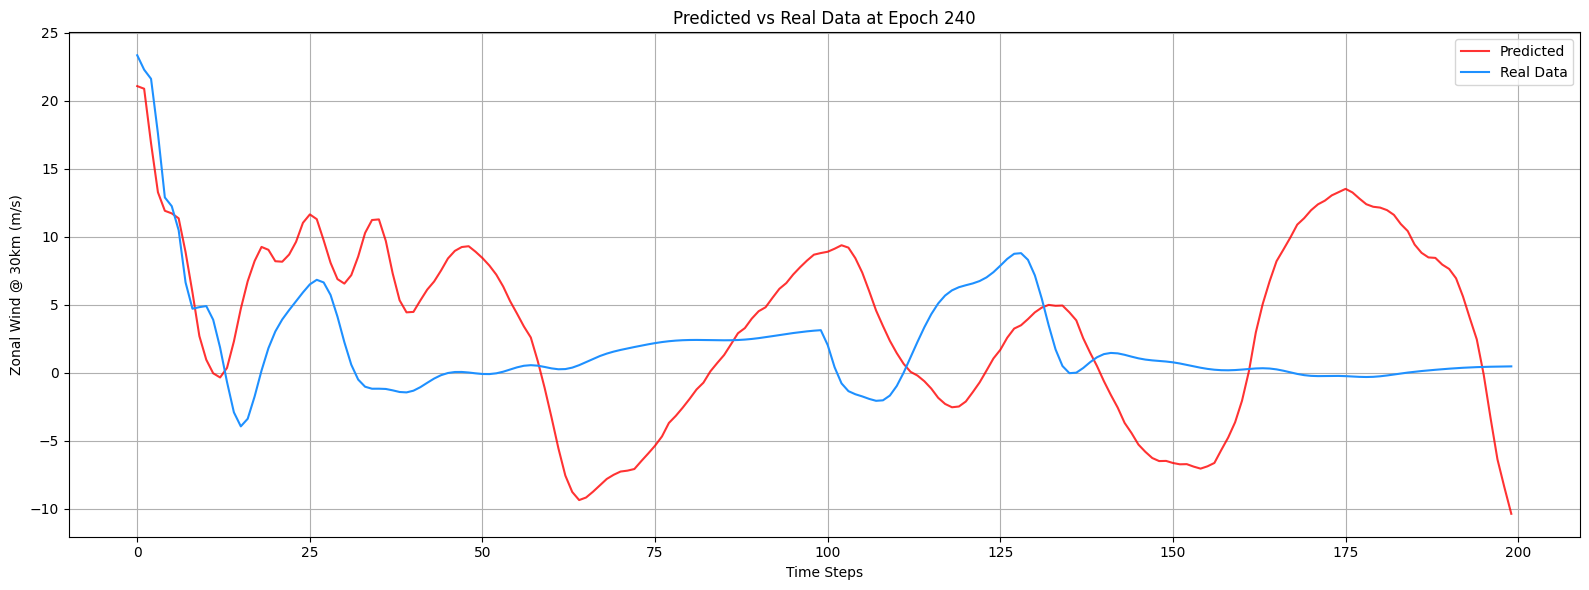

Epoch 242, 
        Reconstrunction Loss: 0.014895258471369743

        Validation Reconstrunction Loss: 0.01689799502491951
Epoch 243, 
        Reconstrunction Loss: 0.015210216864943504

        Validation Reconstrunction Loss: 0.017300449311733246
Epoch 244, 
        Reconstrunction Loss: 0.015110103413462639

        Validation Reconstrunction Loss: 0.01728549785912037
Epoch 245, 
        Reconstrunction Loss: 0.01502277422696352

        Validation Reconstrunction Loss: 0.017051924020051956
Epoch 246, 
        Reconstrunction Loss: 0.01505328994244337

        Validation Reconstrunction Loss: 0.017213787883520126
Epoch 247, 
        Reconstrunction Loss: 0.015209721401333809

        Validation Reconstrunction Loss: 0.016910795122385025
Epoch 248, 
        Reconstrunction Loss: 0.014913889579474926

        Validation Reconstrunction Loss: 0.017546329647302628
Epoch 249, 
        Reconstrunction Loss: 0.015121765434741974

        Validation Reconstrunction Loss: 0.017366314306855

Mini Inference at Epoch 250: 100%|██████████| 200/200 [00:00<00:00, 660.62it/s]


<Figure size 640x480 with 0 Axes>

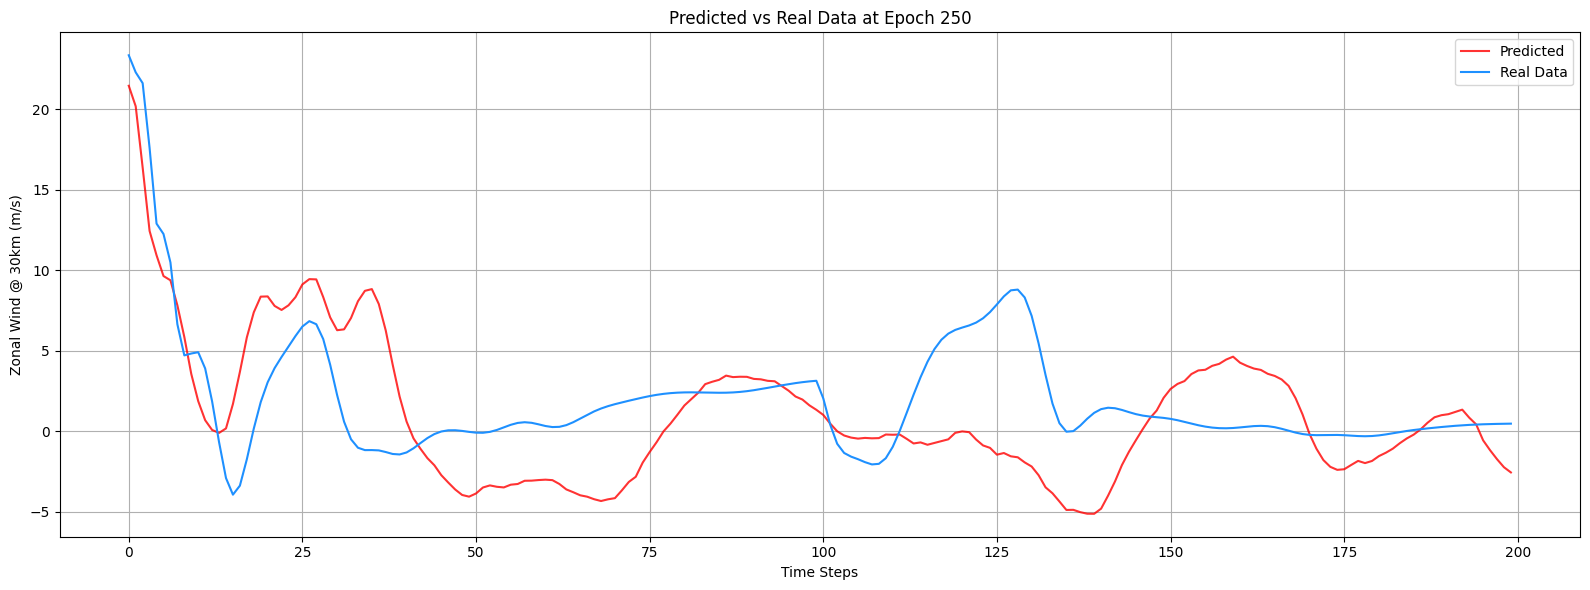

Epoch 252, 
        Reconstrunction Loss: 0.015186325646936893

        Validation Reconstrunction Loss: 0.017421092838048935
Epoch 253, 
        Reconstrunction Loss: 0.015158786438405514

        Validation Reconstrunction Loss: 0.017247924581170082
Epoch 254, 
        Reconstrunction Loss: 0.01516767404973507

        Validation Reconstrunction Loss: 0.017743416130542755
Epoch 255, 
        Reconstrunction Loss: 0.014978951774537563

        Validation Reconstrunction Loss: 0.01741817221045494
Epoch 256, 
        Reconstrunction Loss: 0.01506874617189169

        Validation Reconstrunction Loss: 0.01727147214114666
Epoch 257, 
        Reconstrunction Loss: 0.015226282179355621

        Validation Reconstrunction Loss: 0.016836833208799362
Epoch 258, 
        Reconstrunction Loss: 0.015116562135517597

        Validation Reconstrunction Loss: 0.01720026135444641


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [6]:
from scipy.stats import linregress
from tqdm import tqdm

def normalize_transition_time(slope_value, delta, transition_real):
    normalized = 1 - np.exp(-np.abs((slope_value - transition_real)) / delta)
    return normalized

def total_variation_distance(p, q):
    p = np.array(p)
    q = np.array(q)
    return 0.5 * np.sum(np.abs(p - q))

def calculate_transition_durations(y_values, upper_bound, lower_bound):
    times_between_transitions = []
    transition_start = None
    above_upper = False
    below_lower = False
    for i in range(1, len(y_values)):
        if y_values[i] < lower_bound:
            below_lower = True
            above_upper = False
        elif y_values[i] > upper_bound:
            if below_lower and transition_start is not None:
                times_between_transitions.append(i - transition_start)
                transition_start = None
            above_upper = True
            below_lower = False
        if below_lower and transition_start is None:
            transition_start = i
    return times_between_transitions


upper_bound = 53.8 / 2.8935
lower_bound = 7.41
level = 63
real_data = np.load(r'/home/fabio/work/HM_and_AI_models/VAE_Model/data/time_series_deterministic.npy')

real_data_1d = real_data[:, level]
real_durations = calculate_transition_durations(real_data_1d, upper_bound, lower_bound)
real_data_sorted = np.sort(real_durations)
transition_real = np.mean(real_data_sorted)
actual_hist, bin_edges = np.histogram(real_data[:, level], bins=50, density=True)
print(f"Reference Real Data average_transition_time: {transition_real}")

# Train the model
for epoch in range(num_epochs):
    z_train = torch.zeros([batch_size,latent_dim])
    z_val = torch.zeros([batch_size,latent_dim])
    model.train()
    for batch in range (0, trainN, batch_size):
        input_batch = psi_train_input[batch:batch + batch_size,:]
        label_batch = psi_train_label[batch:batch + batch_size,:]

        optimizer.zero_grad()

        z_train = torch.randn_like(z_train)
        z_train = z_train[:input_batch.shape[0],:]

        output = model(z_train.float().cuda(), input_batch.float().cuda())

        # Reconstruction loss
        reconstruction_loss = F.huber_loss(output, label_batch.float().cuda(), reduction="mean", delta = 1)
        
        #current loss
        loss = reconstruction_loss

        loss.backward()
        optimizer.step()

    print(f'''Epoch {epoch+1}, 
        Reconstrunction Loss: {loss.item()}''')

    # Validation Loss
    for batch in range (0, valN, batch_size):

        input_batch = psi_val_input[batch:batch + batch_size,:]
        label_batch = psi_val_label[batch:batch + batch_size,:]
        
        z_val = torch.randn_like(z_val)
        z_val = z_val[:input_batch.shape[0],:]

        output = model(z_val.float().cuda(), input_batch.float().cuda())

        # Reconstruction loss
        val_reconstruction_loss = F.huber_loss(output, label_batch.float().cuda(), reduction="mean", delta = 1)
        
        # Total loss
        val_loss = val_reconstruction_loss

    print(f'''
        Validation Reconstrunction Loss: {val_loss.item()}''')
      
    #Save and make an inference every 10 epochs of training
    if (epoch % 10 == 0):
        torch.save(model.state_dict(), f"{folder}/model_at_epoch{epoch}")
        model.eval()
        with torch.no_grad():
            initial_cond = torch.reshape(torch.tensor(psi[0,:]), [1, 75]).float().cuda()
            z = torch.zeros([1, latent_dim]).float().cuda()
            time_steps = 200 
            pred = np.zeros([time_steps, 75])
            for k in tqdm(range(0, time_steps), desc = f"Mini Inference at Epoch {epoch}"):
                    z = torch.randn_like(z)
                    y = (model.decode(z.float().cuda(), initial_cond.float().cuda())).detach().cpu().numpy()
                    pred[k, :] = y
                    y_denorm = (y * std_psi[:, :] + mean_psi[:, :])
                    initial_cond = torch.tensor((y_denorm - mean_psi[:, :]) / std_psi[:, :])
        
        pred_mean = pred * std_psi + mean_psi
        plt.figure(figsize=(16, 6))
        plt.plot(pred_mean[:, level], label='Predicted', color='red', alpha=0.8)
        plt.plot(real_data[:time_steps, level], label='Real Data', color='dodgerblue')
        plt.title(f'Predicted vs Real Data at Epoch {epoch}')
        plt.xlabel('Time Steps')
        plt.ylabel('Zonal Wind @ 30km (m/s)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{folder}/epoch_{epoch}_pred_vs_real.png')

In [ ]:


# MODIFY THIS LINE FOR MODEL TESTING
model_weights_path = r""

if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")

for _ in range (0,1):
    
    initial_cond = torch.reshape(torch.tensor(psi[0,:]), [1, 75])
    time_step = 300000
    z = torch.zeros([1,latent_dim])
    num_ens = 1
    pred = np.zeros ([time_step, 75, num_ens])

    for k in tqdm(range (0, time_step), desc = "Inference"):
        z = torch.randn_like(z)
        y = (model.decode(z.float().cuda(),initial_cond.float().cuda())).detach().cpu().numpy()
        pred[k,:] = y
        y_denorm = (y * std_psi[:, :] + mean_psi[:, :])
        initial_cond = torch.tensor((y_denorm - mean_psi[:, :]) / std_psi[:, :])

    # Denormalize final preds
    pred = pred.reshape(pred.shape[0], pred.shape[1])
    print(pred.shape, psi.shape)
    pred_mean = pred[:300000, :] * std_psi[:, :] + mean_psi[:, :]
    
    # Denormalize test labels
    actual_values = psi[:300000, :] * std_psi[:, :] + mean_psi[:, :]
    print(actual_values)

    plt.figure(figsize=(20,8))
    plt.plot(pred_mean[0:30000, 63], color = 'red')
    plt.plot(actual_values[0:30000, 63], color ='dodgerblue')
    plt.grid(True)
    plt.title(f"Predictions vs Actual")
    plt.savefig(f'C:\Users\danie\OneDrive\Desktop\work_torch\{datetime.datetime.now()}.png')
    plt.show()

    np.save(f'C:\Users\danie\OneDrive\Desktop\work_torch', pred_mean)

# Testing

In [ ]:
#FLAGS to determine testing
plot_data = 1
#what level do you want to plot
level = 63
CCDF = 1
Bi_modal_distribution = 1
single_step_profiles = 1
#for the single_step_profiles
NUM_SAMPLES = 5
#what weights do you want to use?
MODEL_PATH = r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_KL_TEST_at_2025-06-03 10:39:03.562572/model_at_2_with_kl_10/checkpoint_2"
LEVEL = 63

import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

# Load the data; shape = (300000, 2, 75)
real_data = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
predictions = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/predictions_best_checkpoint_and_cycle_Resnet_VAE_1.npy")

#reshape the predictions so that it matches the real_data shape
print(predictions.shape)
print(real_data.shape)
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.%f")
folder = f"testing_at_{timestamp}"
os.mkdir(folder)
subfolders = ['timeseries', 'CCDF', 'bi_modal_distribution', 'single_step_profiles']
# Create each subdirectory inside the main folder
for subfolder in subfolders:
    path = os.path.join(folder, subfolder)
    os.mkdir(path)
    print(f"Created subfolder: {path}")
SAVE_DIR = os.path.join(folder, "single_step_profiles")
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import random

model = ConditionalVAE(latent_dim, output_dim, condition_dim)
model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# MODIFY THIS LINE FOR MODEL TESTING
model_weights_path = "/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-11 12:46:39.526973/model_at_0/checkpoint_3"

if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")
    
if (plot_data):
    #note that the value 300000 will have to change depending on the real and predictions data length
    u_profile_real = real_data[:300000, 1, level]  # Match time length with predictions
    u_profile_pred = predictions[:, level]
    time_steps = np.arange(len(u_profile_pred))

    # === Plot ===
    plt.figure(figsize=(14, 6))

    plt.plot(time_steps, u_profile_real, label='Real Data', alpha=0.7)
    plt.plot(time_steps, u_profile_pred, label='Predictions', linestyle='--')


    # Labels, legend, and formatting
    plt.xlabel('Time step')
    plt.ylabel('U (m/s)')
    plt.title(f'Time Series of U at Vertical Level {level}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_path = os.path.join(folder, "timeseries")
    save_path = os.path.join(save_path, "real_prediction_plot")
    plt.savefig(save_path)
    plt.show()

if (CCDF):
    real_data_1d = real_data[:, 1, 63]  # Now shape is (309700,)
    predictions_1d = predictions[:, 63]  # shape (300000,)

    # Define bounds (assuming they apply to both datasets)
    upper_bound = 53.8 / 2.8935
    lower_bound = 1.75 / 2.8935

    # Function to calculate transition durations
    def calculate_transition_durations(y_values, upper_bound, lower_bound):
        times_between_transitions = []
        transition_start = None
        above_upper = False
        below_lower = False

        for i in range(1, len(y_values)):
            if y_values[i] < lower_bound:  
                below_lower = True
                above_upper = False
            elif y_values[i] > upper_bound:  
                if below_lower and transition_start is not None:
                    times_between_transitions.append(i - transition_start)
                    transition_start = None  
                above_upper = True
                below_lower = False

            if below_lower and transition_start is None:
                transition_start = i

        return times_between_transitions

    # Compute transition durations for real data
    real_durations = calculate_transition_durations(real_data_1d, upper_bound, lower_bound)

    # Compute transition durations for predictions data
    pred_durations = calculate_transition_durations(predictions_1d, upper_bound, lower_bound)

    # Plot setup
    plt.figure(figsize=(10, 6))

    # === REAL DATA CCDF AND FIT ===
    if len(real_durations) == 0:
        print("No transitions detected in real data with current bounds!")
    else:
        real_data_sorted = np.sort(real_durations)
        x_line_real = np.linspace(min(real_data_sorted), max(real_data_sorted), 100)
        exponential_fit_real = 1/np.mean(real_data_sorted)
        y_values_real = exponential_fit_real*x_line_real
        plt.plot(x_line_real, y_values_real, 'b-', label=f'Real Exp Fit (slope={exponential_fit_real:.4f})', linewidth=2)

    # === PREDICTIONS CCDF AND FIT ===
    if len(pred_durations) == 0:
        print("No transitions detected in predictions with current bounds!")
    else:
        pred_data_sorted = np.sort(pred_durations)
        x_line_pred = np.linspace(min(pred_data_sorted), max(pred_data_sorted), 100)
        exponential_fit_pred = 1/np.mean(pred_data_sorted)
        y_values_pred = exponential_fit_pred*x_line_pred
        plt.plot(x_line_pred, y_values_pred, 'r-', label=f'Pred Exp Fit (slope={exponential_fit_pred:.4f})', linewidth=2)

    print(1/np.mean(real_data_sorted))
    print(1/np.mean(pred_data_sorted))
    # Plot labels and formatting
    plt.xlabel('Time Duration (Steps)')
    plt.ylabel('CCDF')
    plt.title('CCDF of Time Between B->A and A->B Transitions (Exponential Fit)')
    plt.yscale("linear")  # y-axis log scale
    plt.xscale("linear")  # x-axis linear scale
    plt.grid()
    plt.legend()
    plt.tight_layout()
    save_path = os.path.join(folder, "CCDF")
    save_path = os.path.join(save_path, "CCDF_plot")
    plt.savefig(save_path)
    plt.show()
if (Bi_modal_distribution):
    zonal_wind_data_real = real_data[:, 1, 63]  # variable index 1 (e.g., zonal wind), level 60
    zonal_wind_data_predictions = predictions[:, 63]  # variable index 0 (predictions), level 60

    print(f"Shape of zonal_wind_data_real: {zonal_wind_data_real.shape}")
    print(f"Shape of zonal_wind_data_predictions: {zonal_wind_data_predictions.shape}")

    # Plot the bimodal histogram
    plt.figure(figsize=(12, 6))

    # Create histograms (overlaid)
    sns.histplot(zonal_wind_data_real, bins=50, kde=True, color='black', alpha=0.6, element='step', label='Real Data')
    sns.histplot(zonal_wind_data_predictions, bins=50, kde=True, color='red', alpha=0.6, element='step', label='Predictions')

    # Customize plot labels and title
    plt.title('Distribution of Zonal Winds For Real Data and Predictions', fontsize=16)
    plt.xlabel('Zonal Wind (m/s)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add vertical lines at means
    plt.axvline(np.mean(zonal_wind_data_real), color='black', linestyle='--', label=f'Real Mean: {np.mean(zonal_wind_data_real):.2f}')
    plt.axvline(np.mean(zonal_wind_data_predictions), color='red', linestyle='--', label=f'Pred Mean: {np.mean(zonal_wind_data_predictions):.2f}')

    # Final plot settings
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_path = os.path.join(folder, "bi_modal_distribution")
    save_path = os.path.join(save_path, "bi_modal_distribution_plot")
    plt.savefig(save_path)
    plt.show()
if (single_step_profiles):
    # Ensure save directory exists
    os.makedirs(SAVE_DIR, exist_ok=True)

    # === Load model weights ===
    model.load_state_dict(torch.load(MODEL_PATH))
    model.eval()

    # === Randomly sample time points from real data ===
    time_indices = random.sample(range(0, real_data.shape[0] - 2), NUM_SAMPLES)
    print(f"Randomly sampled time steps: {time_indices}")

    # === Time series visualization ===
    real_data_timeseries = real_data[:, 1, LEVEL]
    time_steps_all = np.arange(len(real_data_timeseries))

    plt.figure(figsize=(12, 6))
    plt.plot(time_steps_all, real_data_timeseries, label="Real Data at Level 61", color='blue')

    # Mark sample points
    for idx_num, idx in enumerate(time_indices):
        plt.axvline(x=idx, color='green', linestyle='--', linewidth=2)
    if len(time_indices) > 0:
        plt.axvline(x=time_indices[0], color='green', linestyle='--', linewidth=2, label='Sampled Points')

    plt.title("Real Data Time Series with Sampled Points Highlighted")
    plt.xlabel("Time Step")
    plt.ylabel("U (m/s) at Level 61")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    save_path = os.path.join(SAVE_DIR, "real_data_timeseries_with_samples.png")
    plt.savefig(save_path)
    plt.show()

    # === Iterate over each sampled time point ===
    for i, time_step in enumerate(time_indices):
        next_time_step = time_step + 1

        # === Real data: current and next ===
        real_current = real_data[time_step, 1, :]       
        real_next = real_data[next_time_step, 1, :]      

        # === Normalize real_current and make prediction for next step ===
        initial_cond = torch.reshape(torch.tensor(psi[time_step,:]), [1, 75])
        z = torch.zeros([1,latent_dim])
        num_ens = 1
        pred = np.zeros ([time_step, 75, num_ens])

        with torch.no_grad():
            z = torch.randn_like(z)
            print(z.shape, initial_cond.shape)
            y = (model.decode(z.float().cuda(),initial_cond.float().cuda())).detach().cpu().numpy()

        # === Denormalize predicted next ===
        pred_next_denorm = y.squeeze() * std_psi.squeeze() + mean_psi.squeeze()

        # === Extract U, Re(Psi), Im(Psi) components ===
        # U profiles
        U_current_real = real_current[51:74]
        U_next_real = real_next[51:74]
        U_next_pred = pred_next_denorm[51:74]

        # Re(Psi) profiles
        RePsi_current_real = real_current[0:24]
        RePsi_next_real = real_next[0:24]
        RePsi_next_pred = pred_next_denorm[0:24]

        # Im(Psi) profiles
        ImPsi_current_real = real_current[25:50]
        ImPsi_next_real = real_next[25:50]
        ImPsi_next_pred = pred_next_denorm[25:50]

        # === Differences ===
        U_diff_real = U_next_real - U_current_real
        U_diff_pred = U_next_pred - U_current_real

        RePsi_diff_real = RePsi_next_real - RePsi_current_real
        RePsi_diff_pred = RePsi_next_pred - RePsi_current_real

        ImPsi_diff_real = ImPsi_next_real - ImPsi_current_real
        ImPsi_diff_pred = ImPsi_next_pred - ImPsi_current_real

        # === Create a single figure with 3 rows (U, Re(Psi), Im(Psi)) ===
        fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # 3 rows, 2 columns (Profile and Difference)

        z_levels_U = np.linspace(0, 70, 23)
        z_levels_RePsi = np.linspace(0, 70, 24)
        z_levels_ImPsi = np.linspace(0, 70, 25)

        # --- U ---
        axes[0, 0].plot(U_current_real, z_levels_U, 'x-', label="Real Current")
        axes[0, 0].plot(U_next_real, z_levels_U, 'd-', label="Real Next")
        axes[0, 0].plot(U_next_pred, z_levels_U, 's--', label="Predicted Next")
        axes[0, 0].set_title(f"U Profiles @ Step {time_step}")
        axes[0, 0].set_xlabel("U (m/s)")
        axes[0, 0].set_ylabel("Vertical Levels (km)")
        axes[0, 0].legend()

        axes[0, 1].plot(U_diff_real, z_levels_U, 'xb', label="Real Δ (Next - Current)")
        axes[0, 1].plot(U_diff_pred, z_levels_U, 'o--r', label="Pred Δ (Next - Current)")
        axes[0, 1].set_title("U Difference (Next - Current)")
        axes[0, 1].set_xlabel("ΔU (m/s)")
        axes[0, 1].legend()

        # --- Re(Psi) ---
        axes[1, 0].plot(RePsi_current_real, z_levels_RePsi, 'x-', label="Real Current")
        axes[1, 0].plot(RePsi_next_real, z_levels_RePsi, 'd-', label="Real Next")
        axes[1, 0].plot(RePsi_next_pred, z_levels_RePsi, 's--', label="Predicted Next")
        axes[1, 0].set_title(f"Re(Psi) Profiles @ Step {time_step}")
        axes[1, 0].set_xlabel("Re(Psi)")
        axes[1, 0].set_ylabel("Vertical Levels (km)")
        axes[1, 0].legend()

        axes[1, 1].plot(RePsi_diff_real, z_levels_RePsi, 'xb', label="Real Δ (Next - Current)")
        axes[1, 1].plot(RePsi_diff_pred, z_levels_RePsi, 'o--r', label="Pred Δ (Next - Current)")
        axes[1, 1].set_title("Re(Psi) Difference (Next - Current)")
        axes[1, 1].set_xlabel("ΔRe(Psi)")
        axes[1, 1].legend()

        # --- Im(Psi) ---
        axes[2, 0].plot(ImPsi_current_real, z_levels_ImPsi, 'x-', label="Real Current")
        axes[2, 0].plot(ImPsi_next_real, z_levels_ImPsi, 'd-', label="Real Next")
        axes[2, 0].plot(ImPsi_next_pred, z_levels_ImPsi, 's--', label="Predicted Next")
        axes[2, 0].set_title(f"Im(Psi) Profiles @ Step {time_step}")
        axes[2, 0].set_xlabel("Im(Psi)")
        axes[2, 0].set_ylabel("Vertical Levels (km)")
        axes[2, 0].legend()

        axes[2, 1].plot(ImPsi_diff_real, z_levels_ImPsi, 'xb', label="Real Δ (Next - Current)")
        axes[2, 1].plot(ImPsi_diff_pred, z_levels_ImPsi, 'o--r', label="Pred Δ (Next - Current)")
        axes[2, 1].set_title("Im(Psi) Difference (Next - Current)")
        axes[2, 1].set_xlabel("ΔIm(Psi)")
        axes[2, 1].legend()

        # === Finalize and Save ===
        plt.suptitle(f"Single Step Profile Comparisons at Time Step {time_step}", fontsize=18)
        plt.tight_layout(rect=[0, 0.03, 1, 0.97])

        save_path = os.path.join(SAVE_DIR, f"Profile_Summary_point_{time_step}.png")
        plt.savefig(save_path)
        plt.show()

        print(f"Combined plot saved for sampled point {time_step}")

    # Final debug
    print("Finished processing all sampled points.")
        # Debugging prints
    print(predictions.shape) 
    print(real_data.shape)